In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv(r"D:\3rd year\2nd semester\Machine Learning in Medicine\project\archive\heart.csv")
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp   
0   63    1   3     145   233    1        0       150     0      2.3    0  \
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
o2 = pd.read_csv(r"D:\3rd year\2nd semester\Machine Learning in Medicine\project\archive\o2Saturation.csv")
o2.head()

O2 saturation
0           98.6
1           98.6
2           98.6
3           98.6
4           98.1

In [4]:
df = pd.concat([df,o2],axis=1)
df.head()

age  sex   cp  trtbps   chol  fbs  restecg  thalachh  exng  oldpeak  slp   
0  63.0  1.0  3.0   145.0  233.0  1.0      0.0     150.0   0.0      2.3  0.0  \
1  37.0  1.0  2.0   130.0  250.0  0.0      1.0     187.0   0.0      3.5  0.0   
2  41.0  0.0  1.0   130.0  204.0  0.0      0.0     172.0   0.0      1.4  2.0   
3  56.0  1.0  1.0   120.0  236.0  0.0      1.0     178.0   0.0      0.8  2.0   
4  57.0  0.0  0.0   120.0  354.0  0.0      1.0     163.0   1.0      0.6  2.0   

   caa  thall  output  O2 saturation  
0  0.0    1.0     1.0           98.6  
1  0.0    2.0     1.0           98.6  
2  0.0    2.0     1.0           98.6  
3  0.0    2.0     1.0           98.6  
4  0.0    2.0     1.0           98.1

In [5]:
df=df.dropna(axis=0) #drop null rows

In [6]:
df.shape

(303, 15)

In [7]:
df.nunique() #count the number of unique values in each column of a DataFrame

age               41
sex                2
cp                 4
trtbps            49
chol             152
fbs                2
restecg            3
thalachh          91
exng               2
oldpeak           40
slp                3
caa                5
thall              4
output             2
O2 saturation      7
dtype: int64

In [8]:
df.describe()

age         sex          cp      trtbps        chol         fbs   
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  \
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa   
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  \
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  O2 saturation  
count  303.000000  303.000000     303.000000  
mean     2.313531    0.544554      97.484488  
std      0.612277    0.498835       0.352649  
min      0.000000    0.000000      96.500000  
25%      2.000000    0.000000      97.500000  
50%      2.000000    1.000000      97.500000  
75%      3.000000    1.000000      97.500000  
max      3.000000    1.000000      98.600000

In [9]:
df.isnull().sum()

age              0
sex              0
cp               0
trtbps           0
chol             0
fbs              0
restecg          0
thalachh         0
exng             0
oldpeak          0
slp              0
caa              0
thall            0
output           0
O2 saturation    0
dtype: int64

In [10]:
#print unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    unique_values_str = ', '.join(str(value) for value in unique_values)
    print(f"'{column}': {unique_values_str}")
    print()



'age': 63.0, 37.0, 41.0, 56.0, 57.0, 44.0, 52.0, 54.0, 48.0, 49.0, 64.0, 58.0, 50.0, 66.0, 43.0, 69.0, 59.0, 42.0, 61.0, 40.0, 71.0, 51.0, 65.0, 53.0, 46.0, 45.0, 39.0, 47.0, 62.0, 34.0, 35.0, 29.0, 55.0, 60.0, 67.0, 68.0, 74.0, 76.0, 70.0, 38.0, 77.0

'sex': 1.0, 0.0

'cp': 3.0, 2.0, 1.0, 0.0

'trtbps': 145.0, 130.0, 120.0, 140.0, 172.0, 150.0, 110.0, 135.0, 160.0, 105.0, 125.0, 142.0, 155.0, 104.0, 138.0, 128.0, 108.0, 134.0, 122.0, 115.0, 118.0, 100.0, 124.0, 94.0, 112.0, 102.0, 152.0, 101.0, 132.0, 148.0, 178.0, 129.0, 180.0, 136.0, 126.0, 106.0, 156.0, 170.0, 146.0, 117.0, 200.0, 165.0, 174.0, 192.0, 144.0, 123.0, 154.0, 114.0, 164.0

'chol': 233.0, 250.0, 204.0, 236.0, 354.0, 192.0, 294.0, 263.0, 199.0, 168.0, 239.0, 275.0, 266.0, 211.0, 283.0, 219.0, 340.0, 226.0, 247.0, 234.0, 243.0, 302.0, 212.0, 175.0, 417.0, 197.0, 198.0, 177.0, 273.0, 213.0, 304.0, 232.0, 269.0, 360.0, 308.0, 245.0, 208.0, 264.0, 321.0, 325.0, 235.0, 257.0, 216.0, 256.0, 231.0, 141.0, 252.0, 201.0, 222.0, 2

# Data Visualization

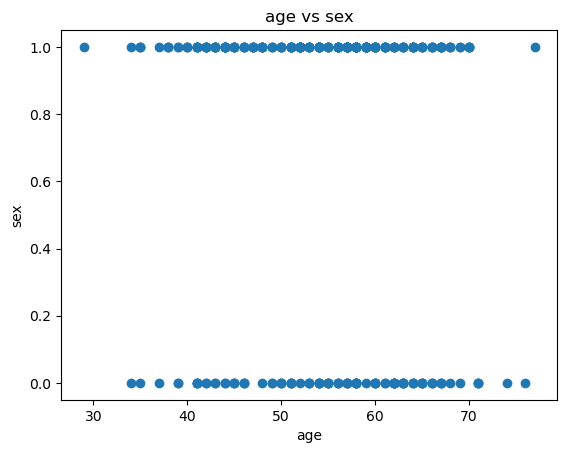

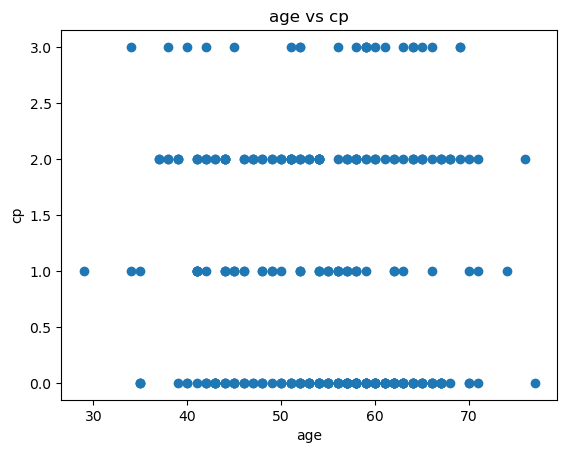

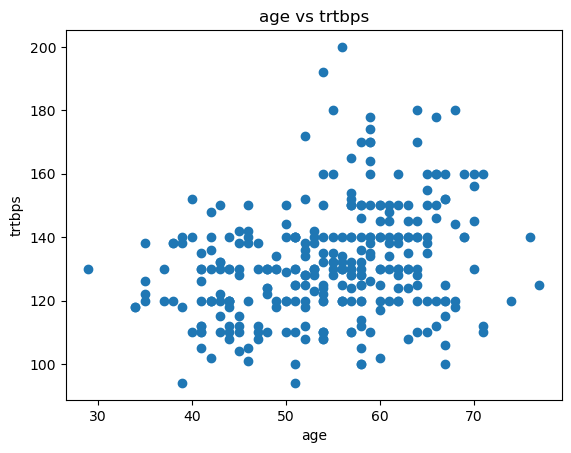

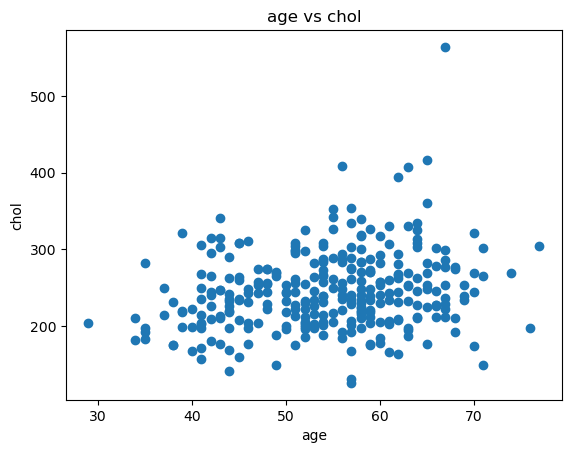

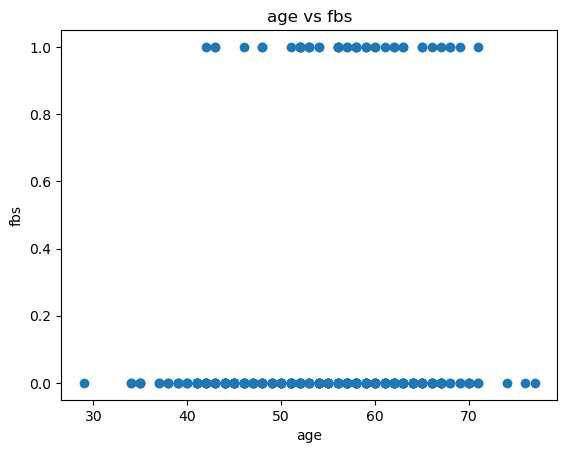

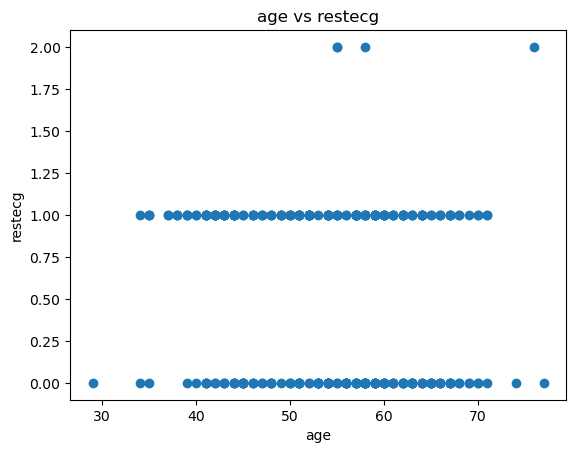

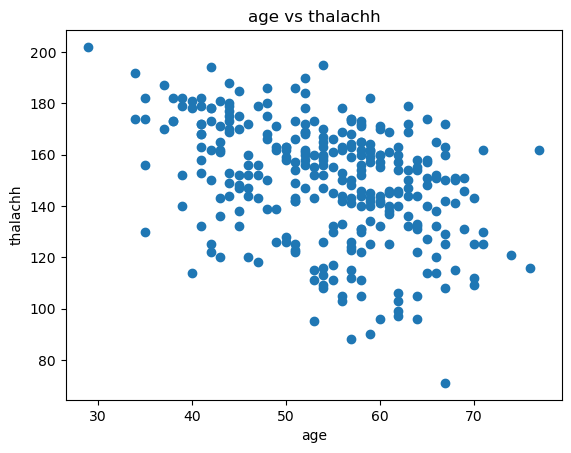

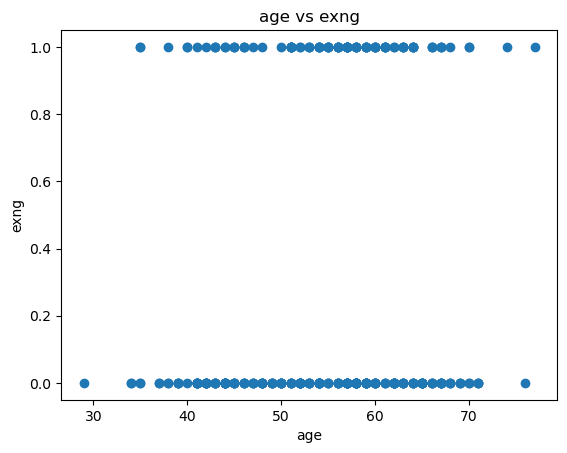

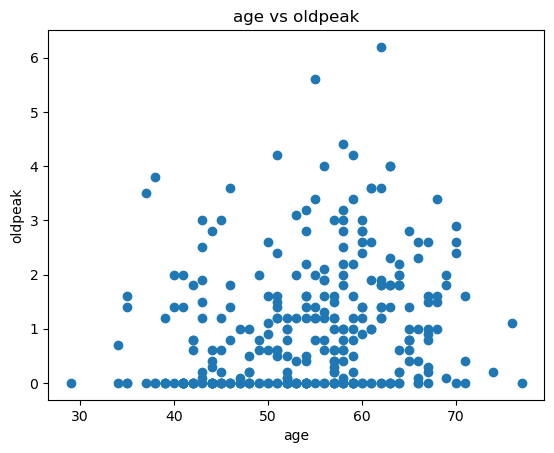

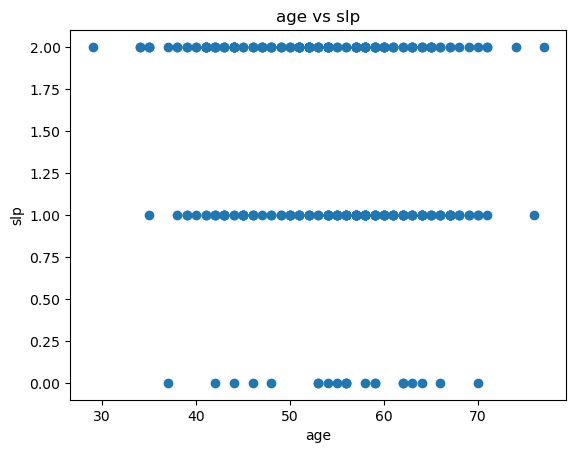

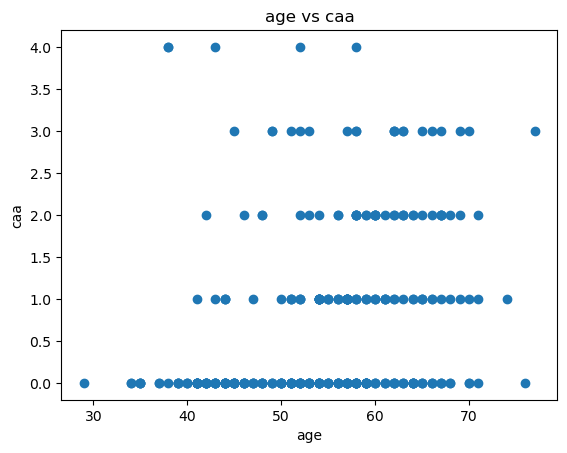

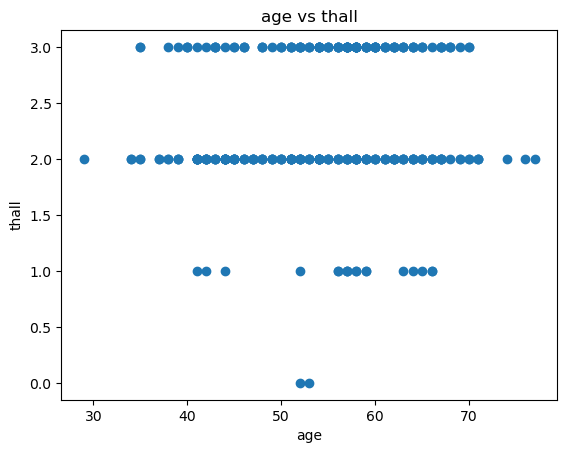

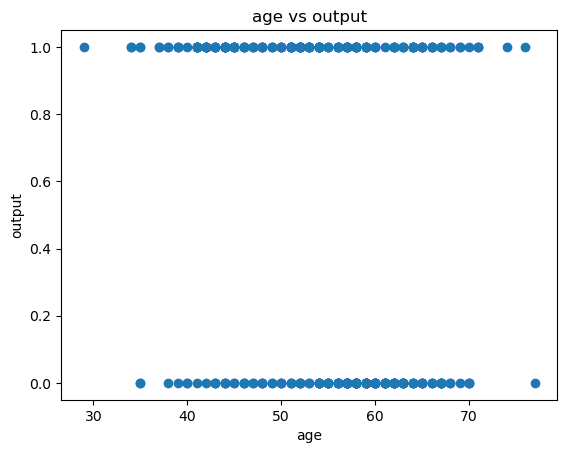

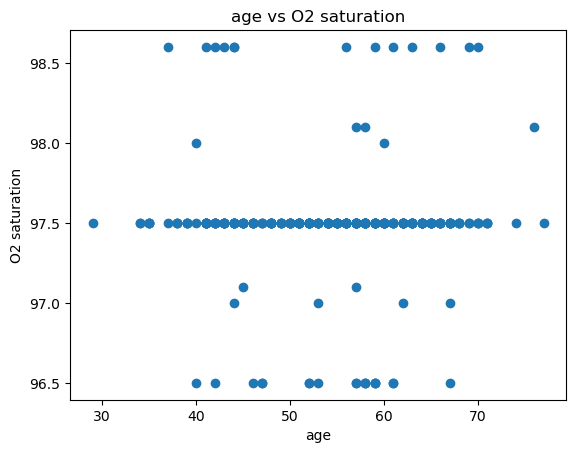

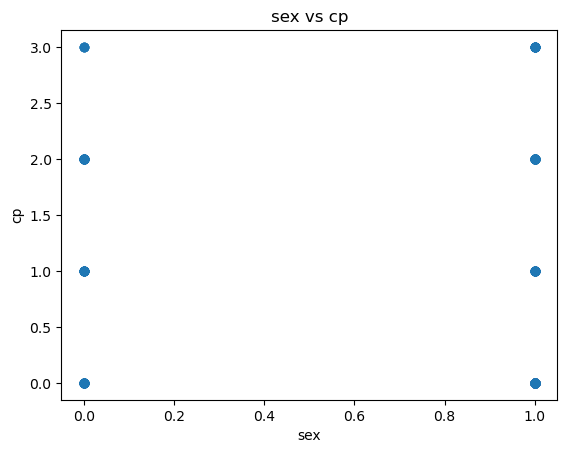

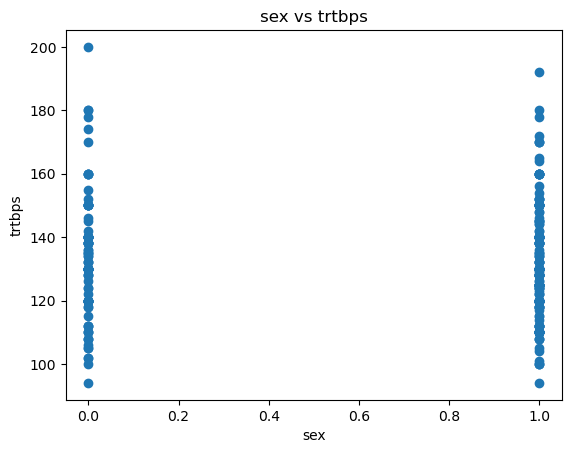

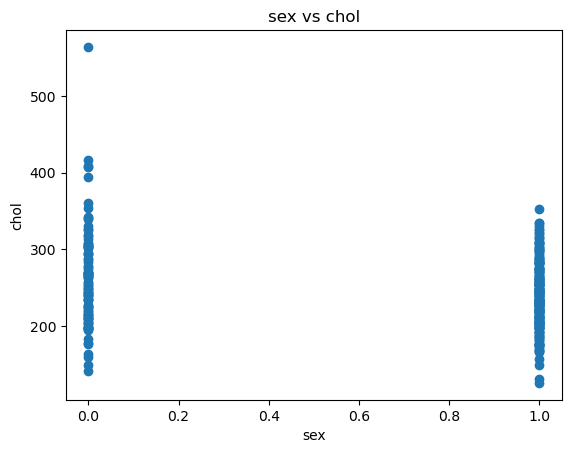

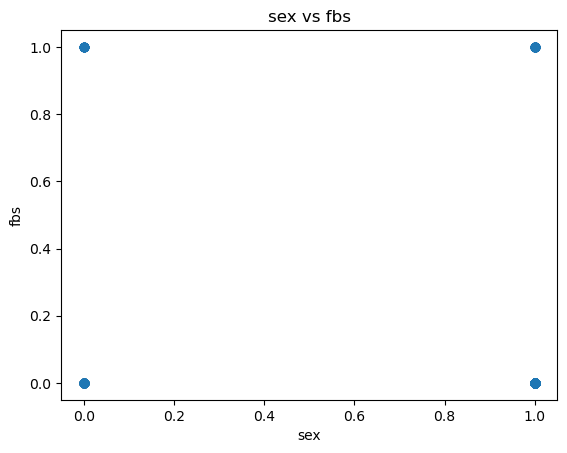

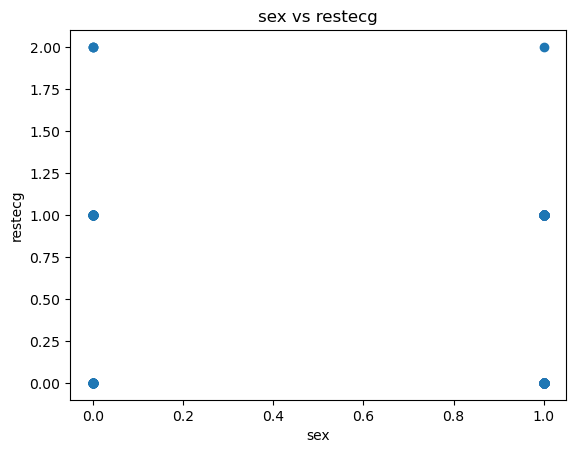

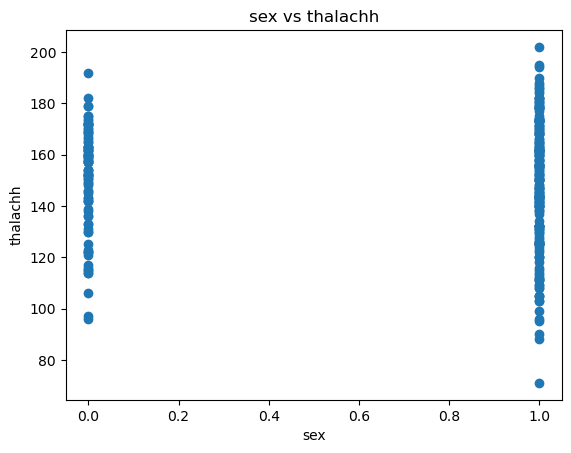

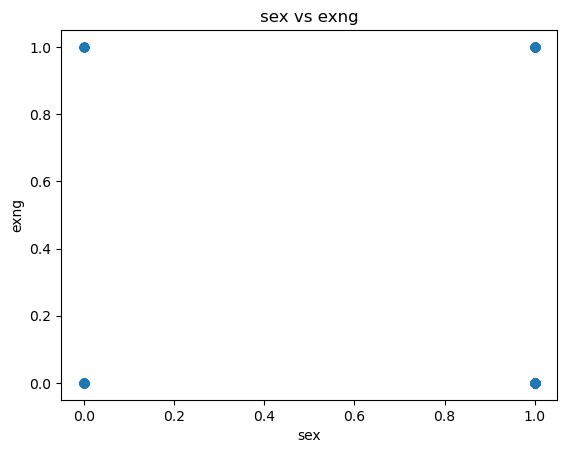

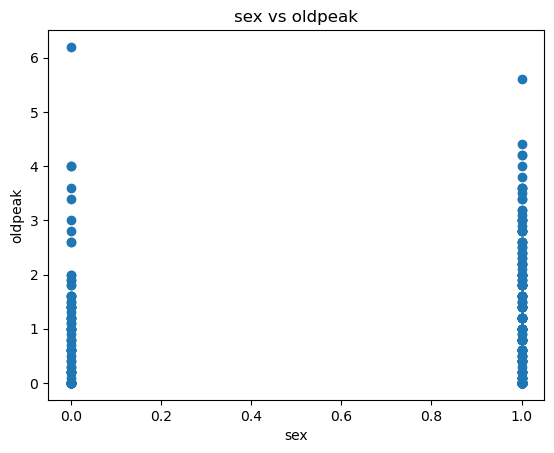

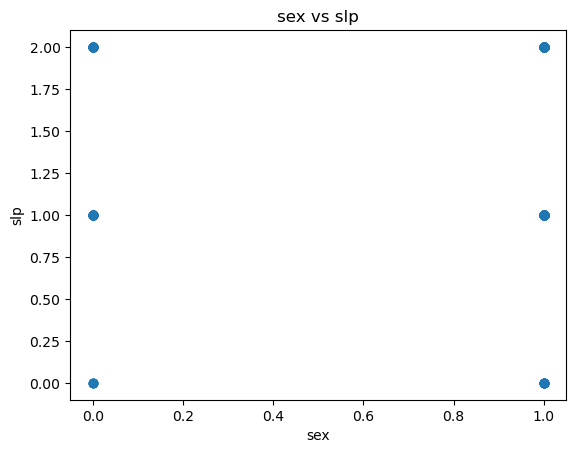

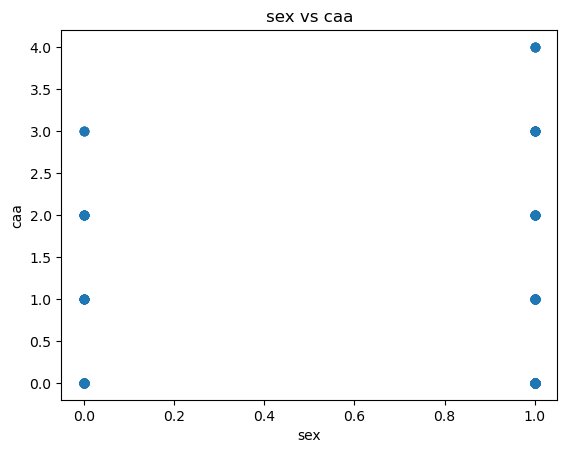

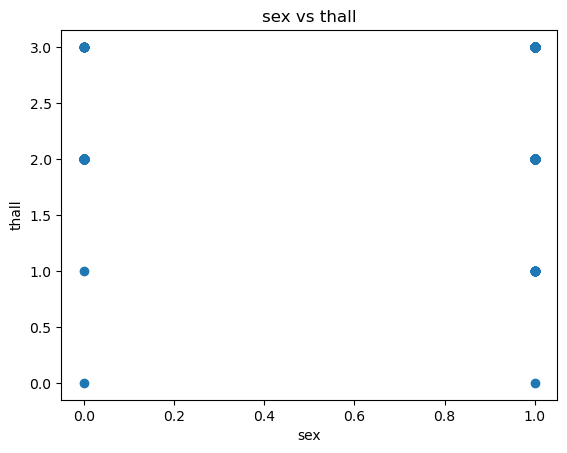

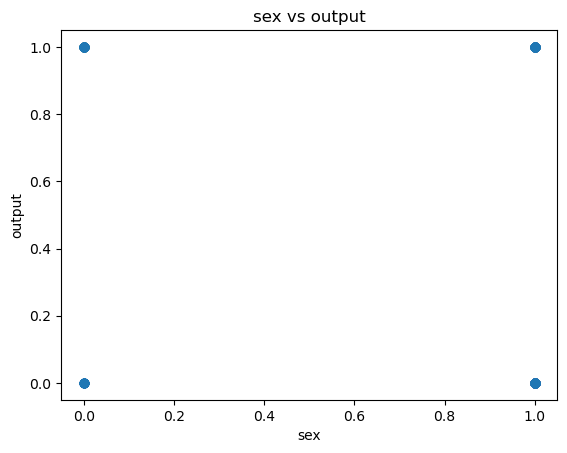

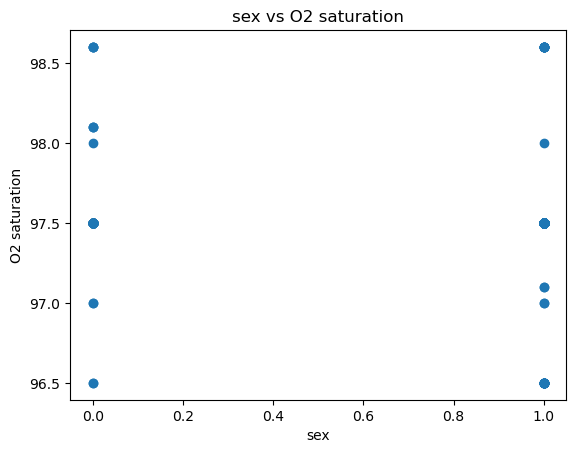

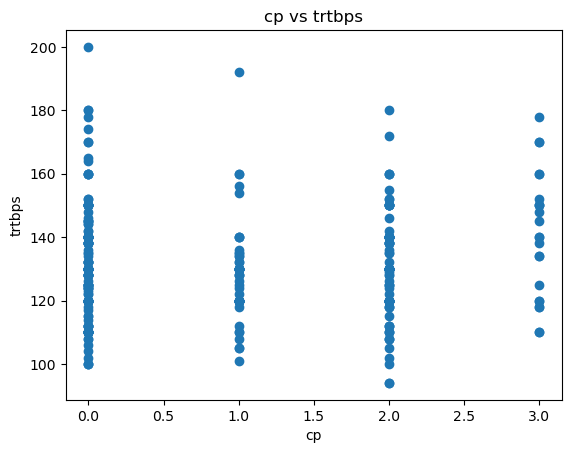

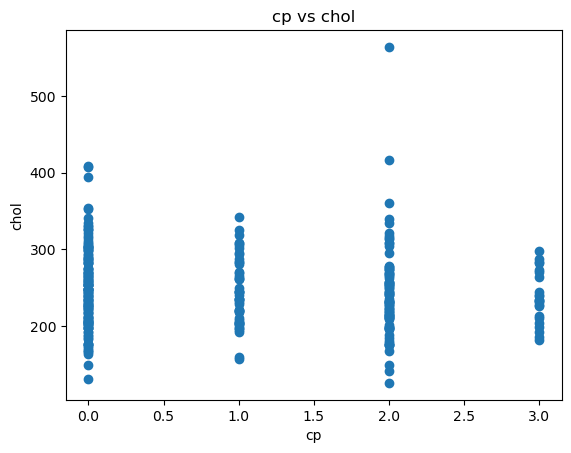

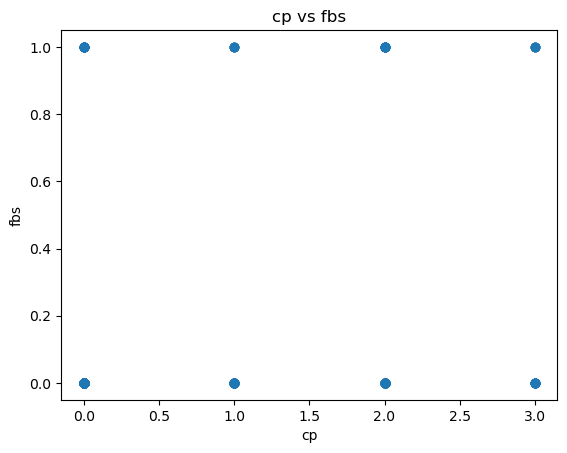

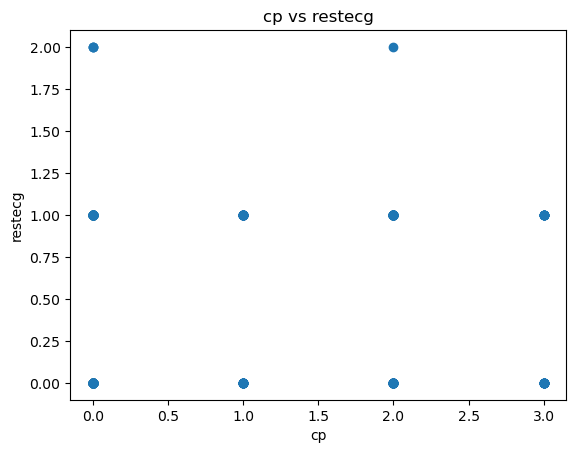

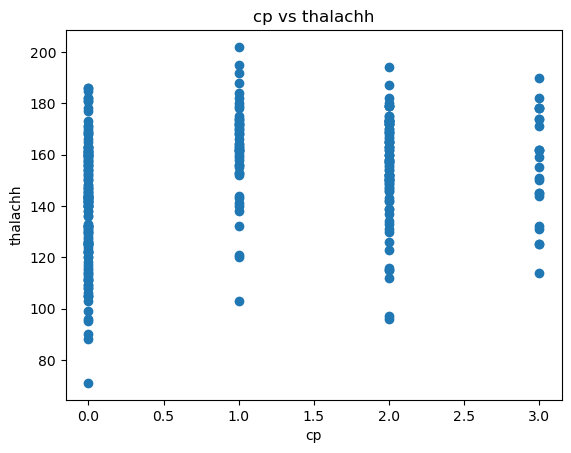

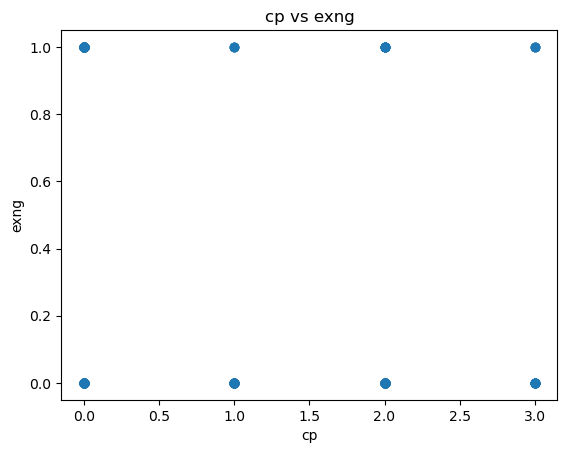

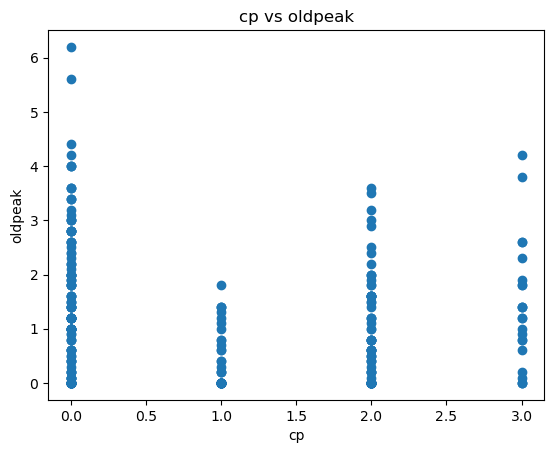

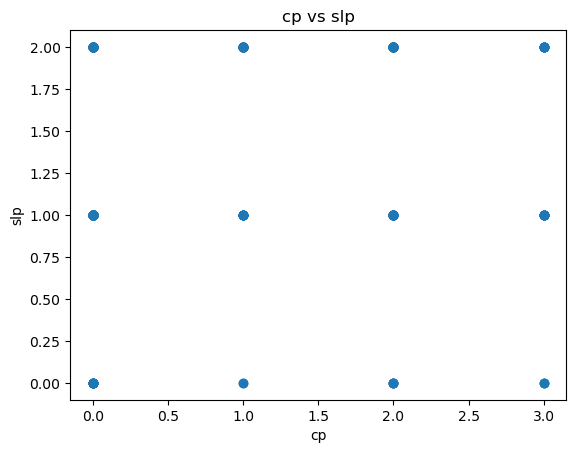

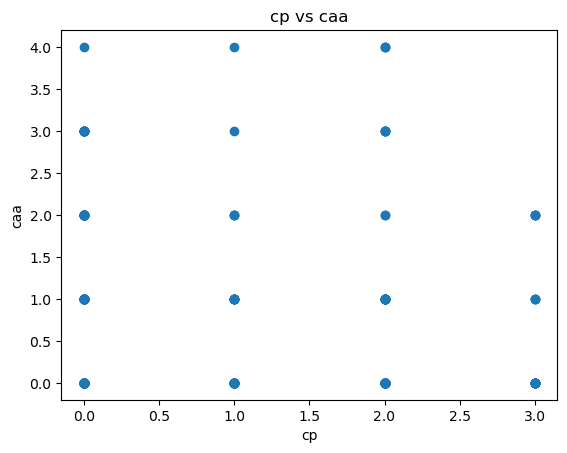

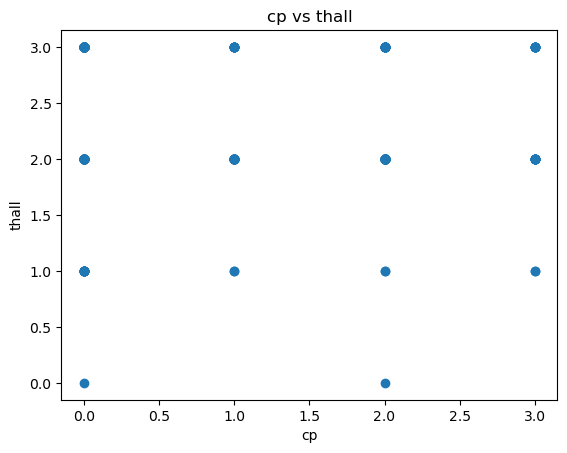

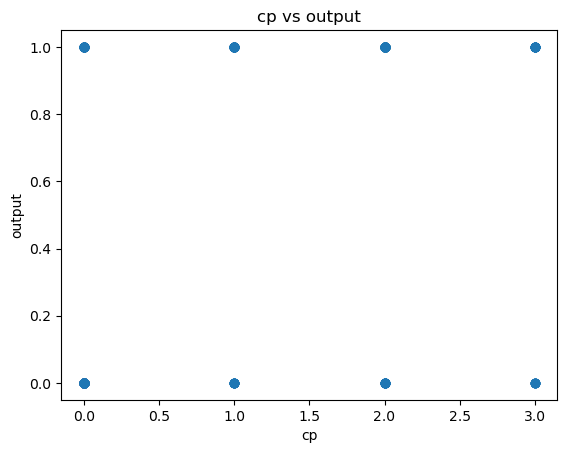

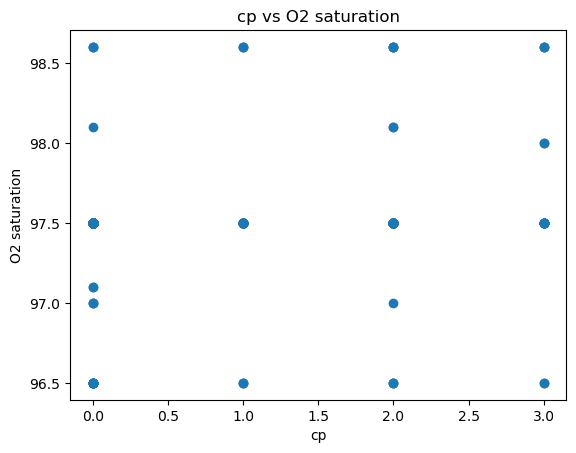

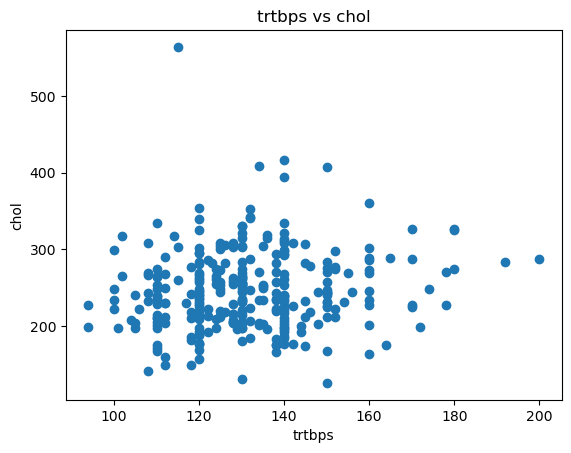

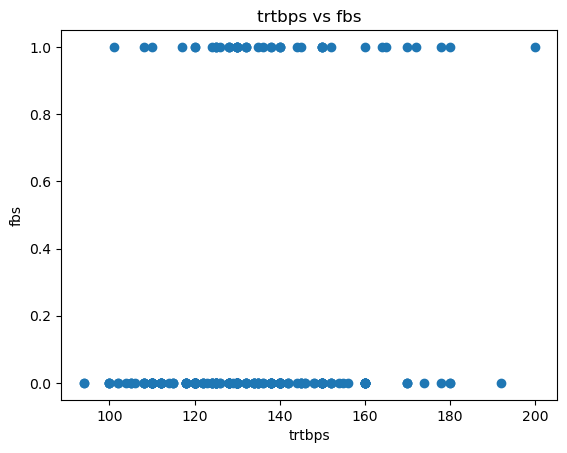

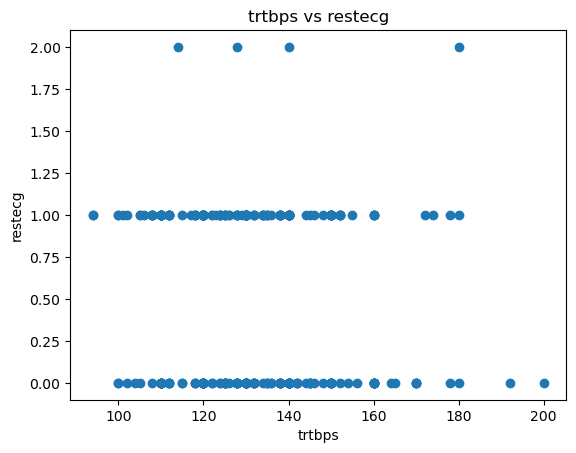

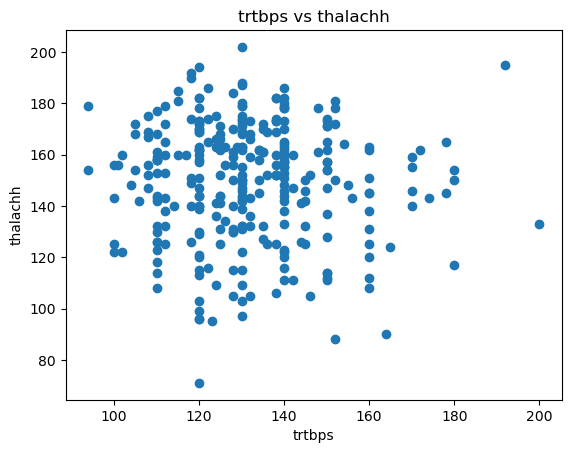

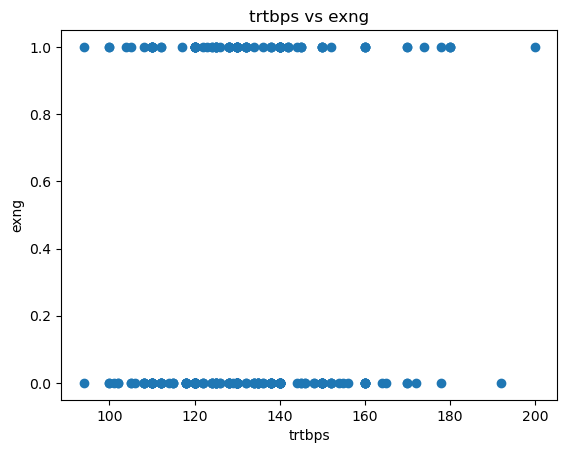

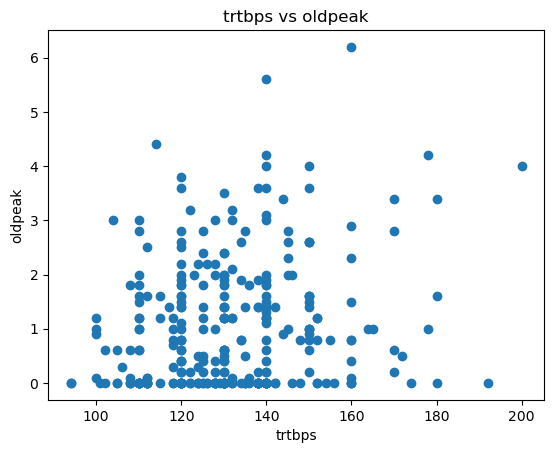

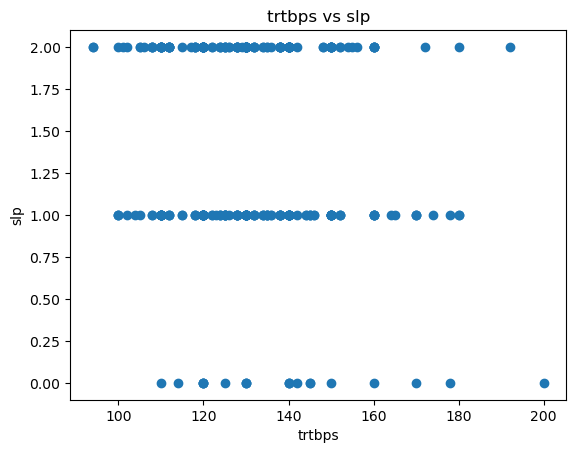

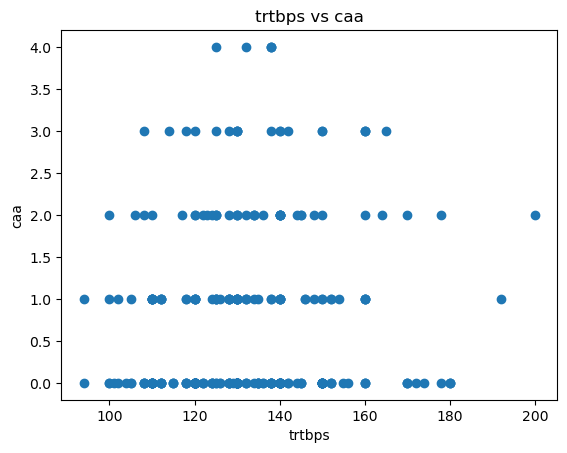

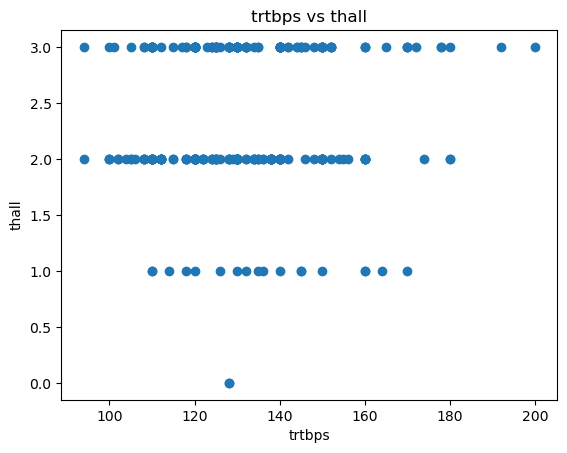

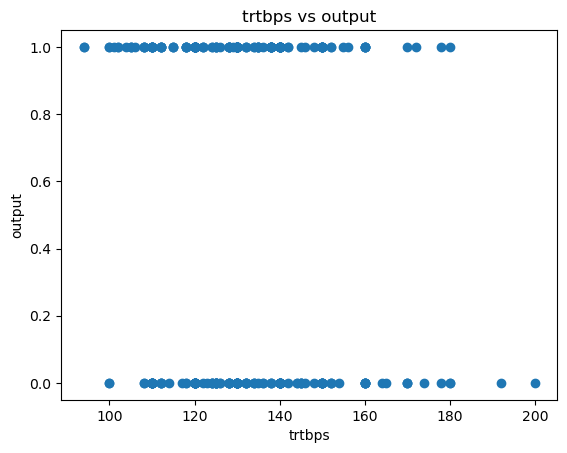

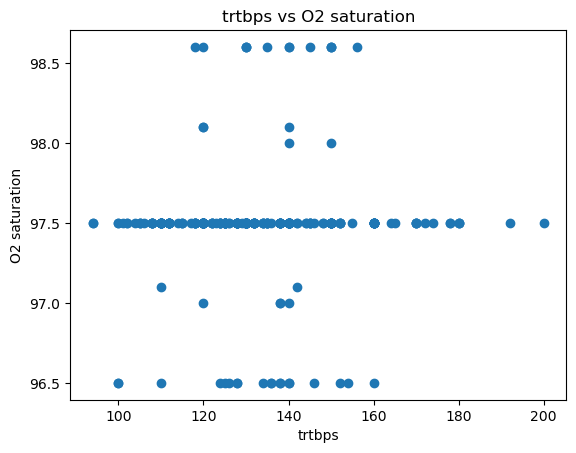

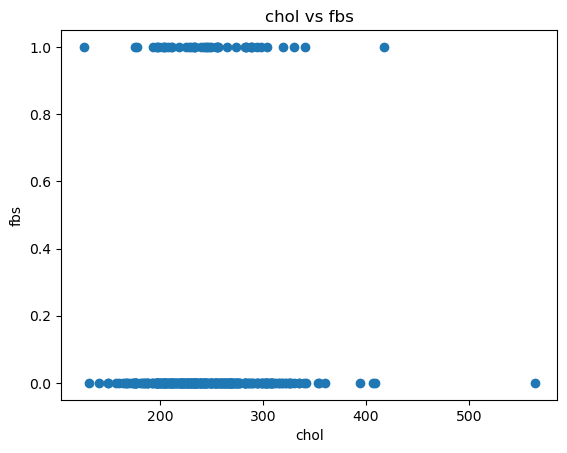

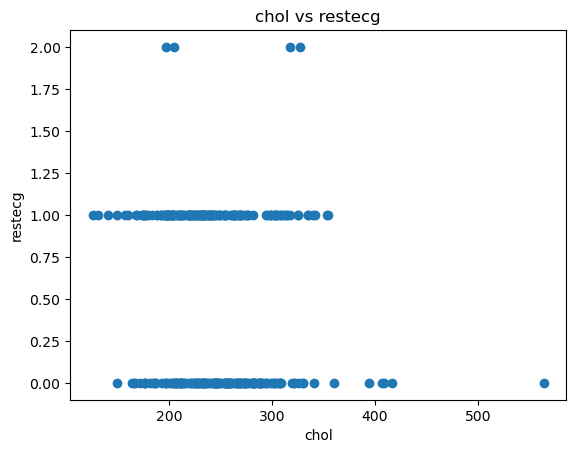

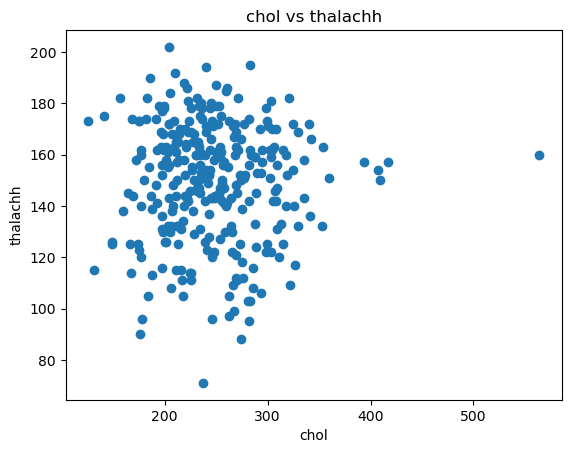

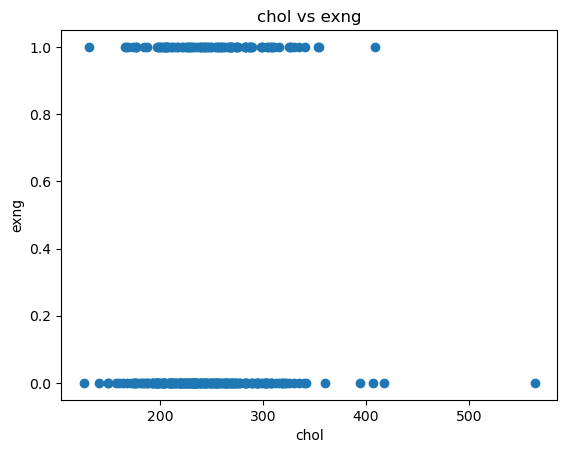

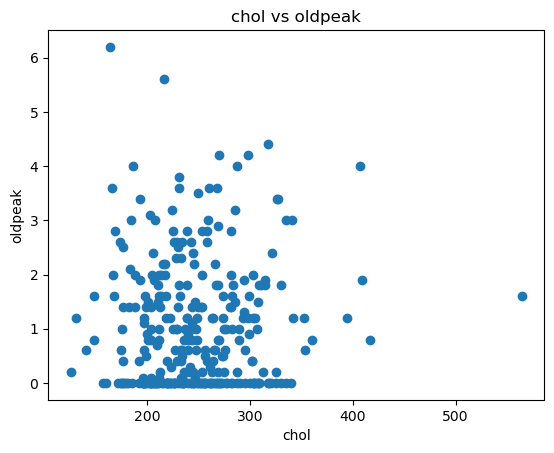

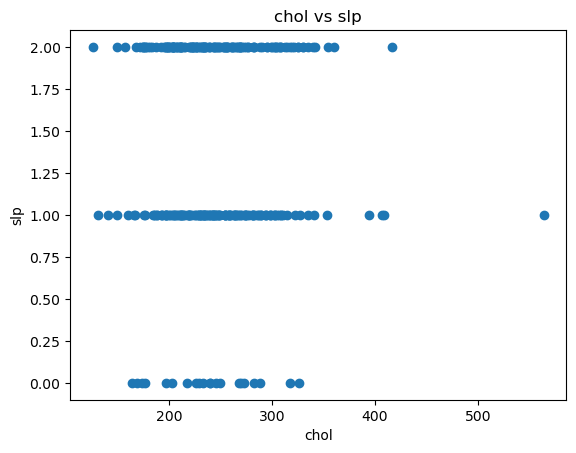

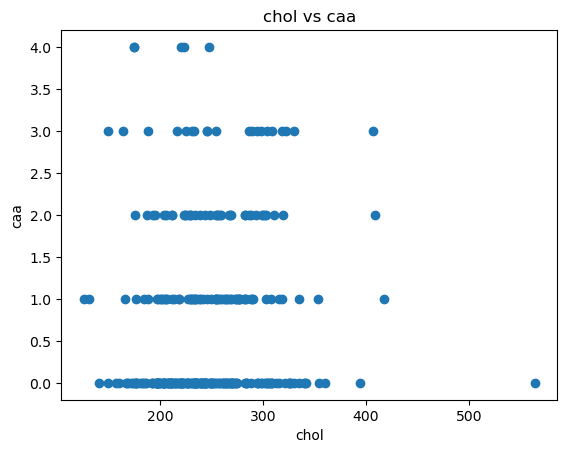

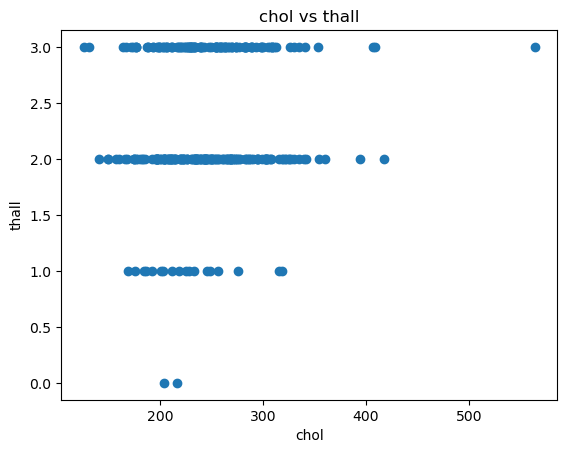

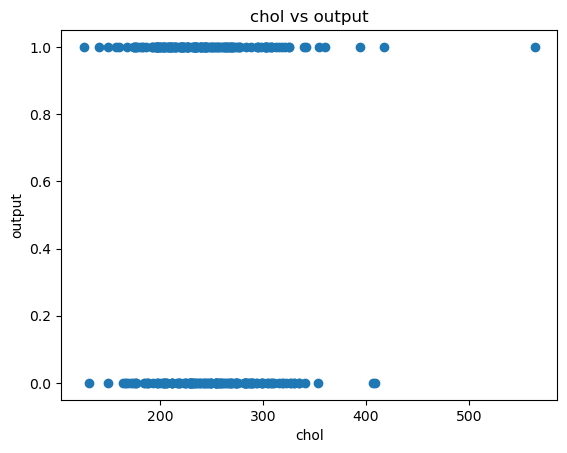

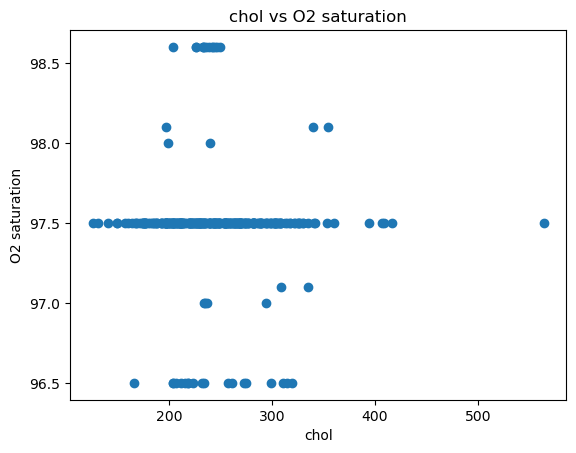

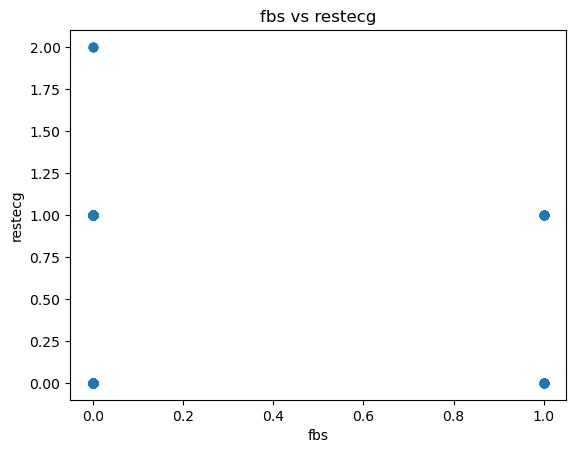

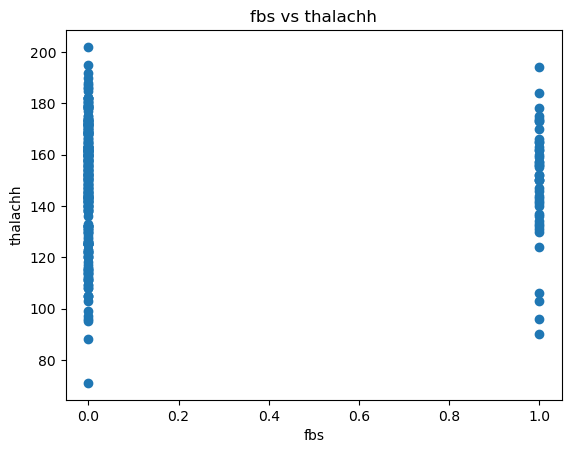

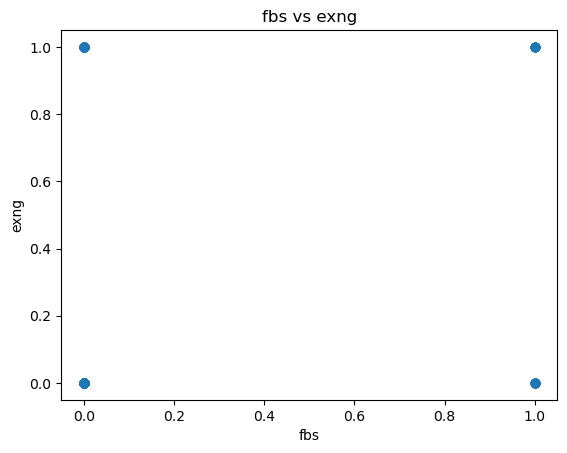

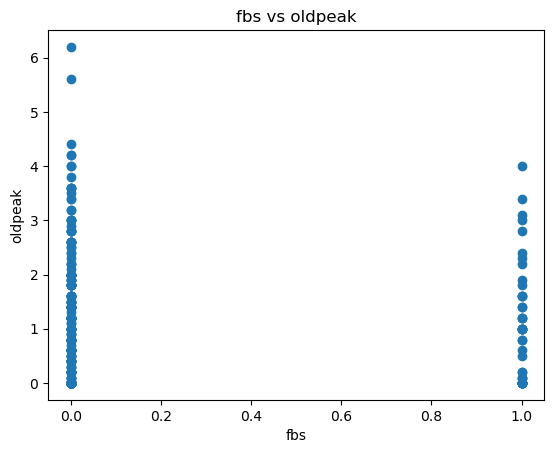

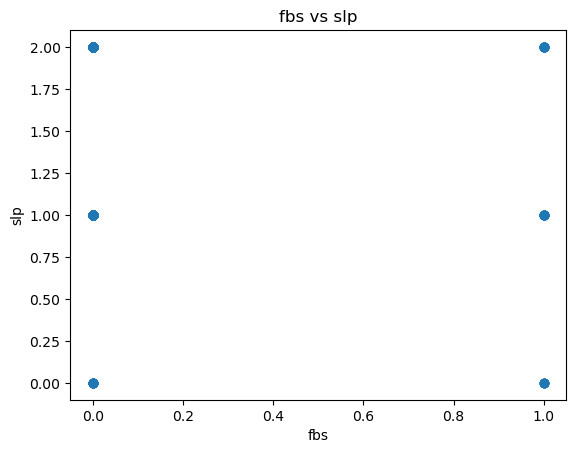

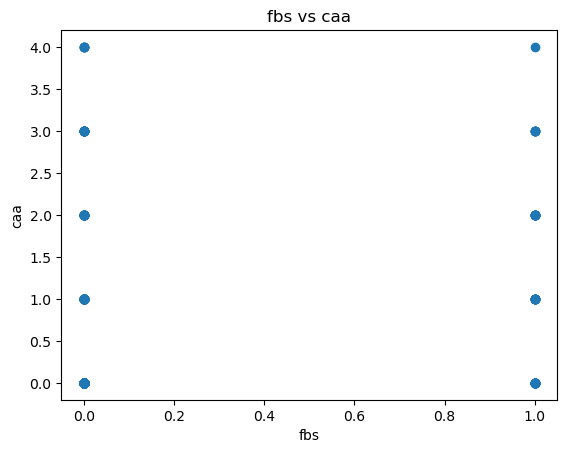

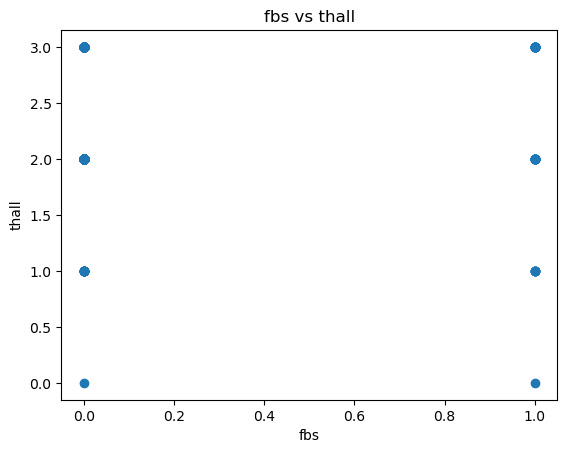

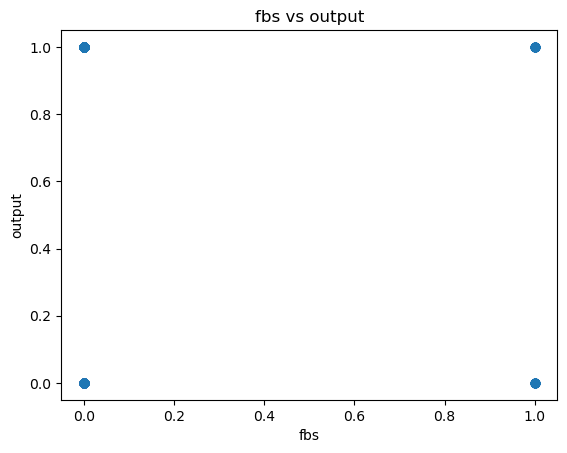

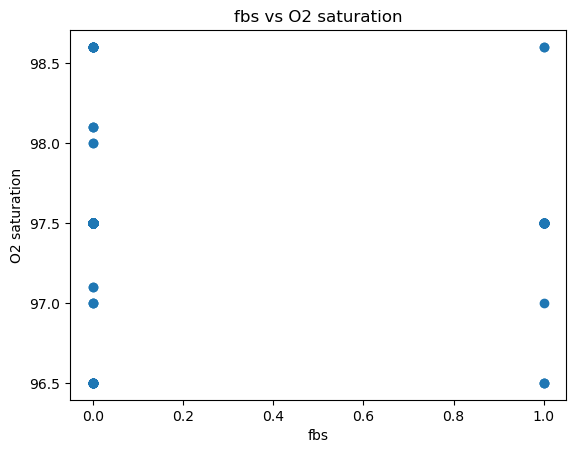

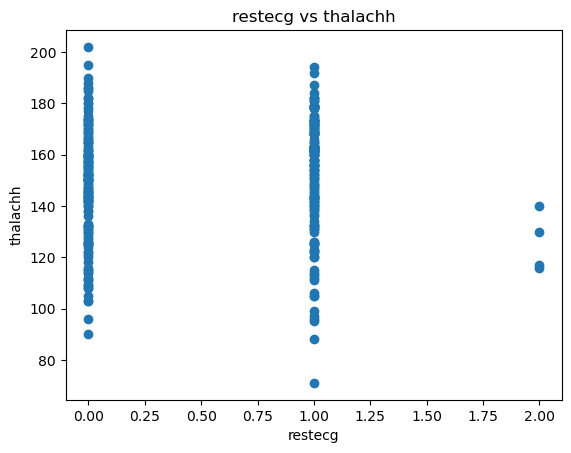

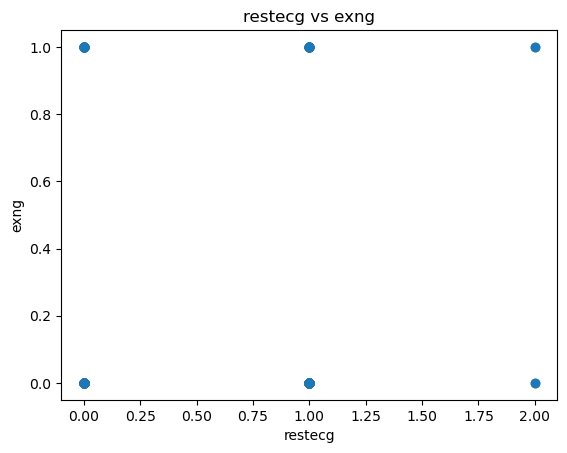

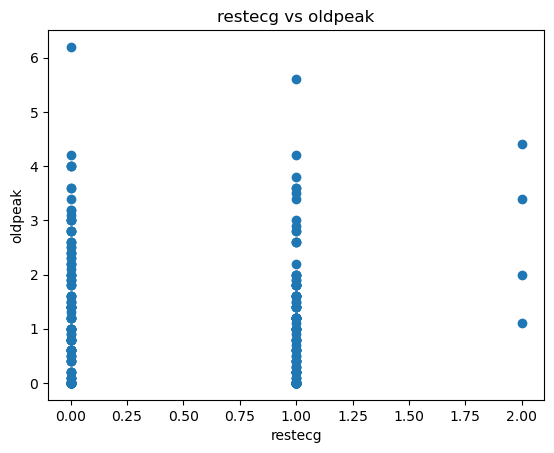

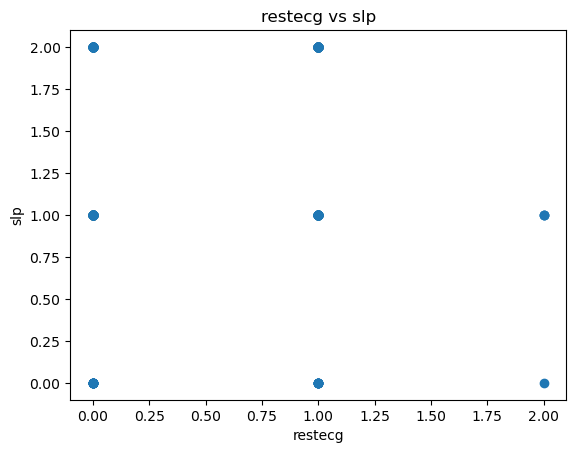

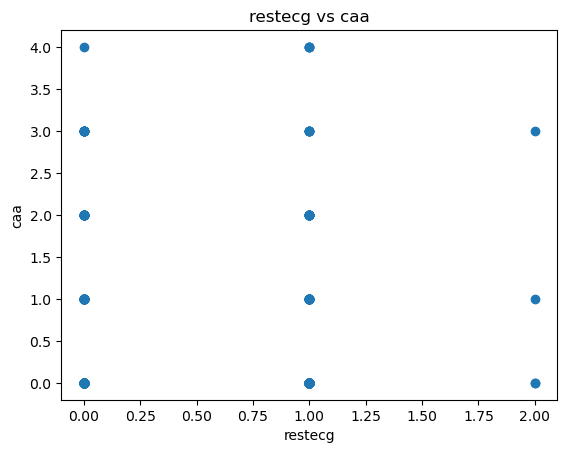

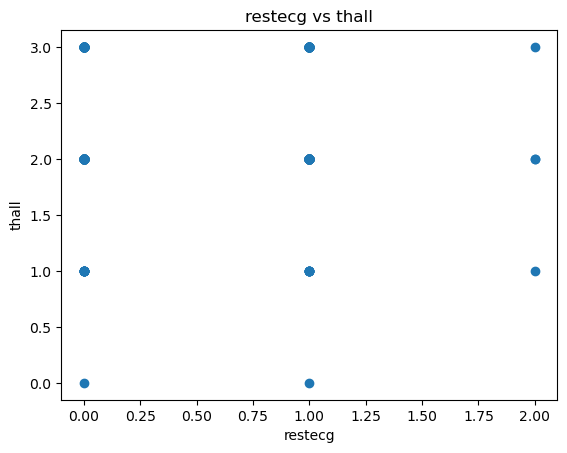

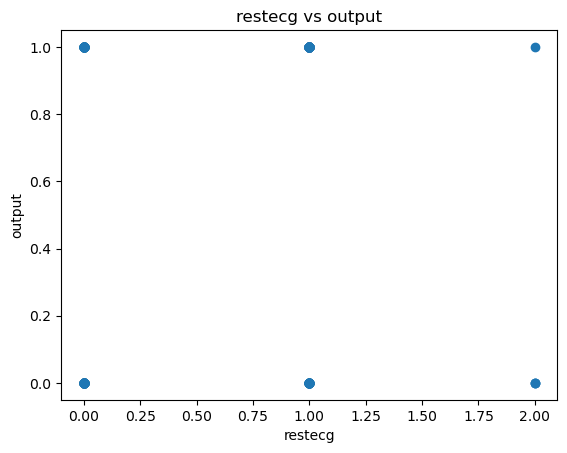

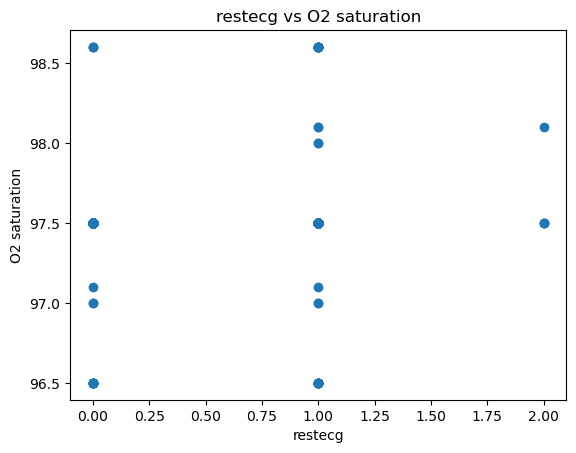

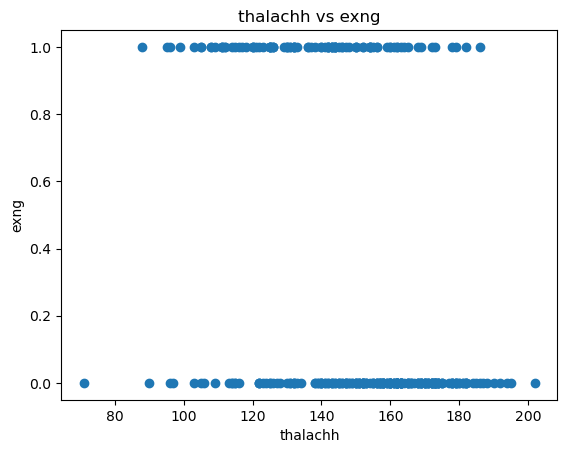

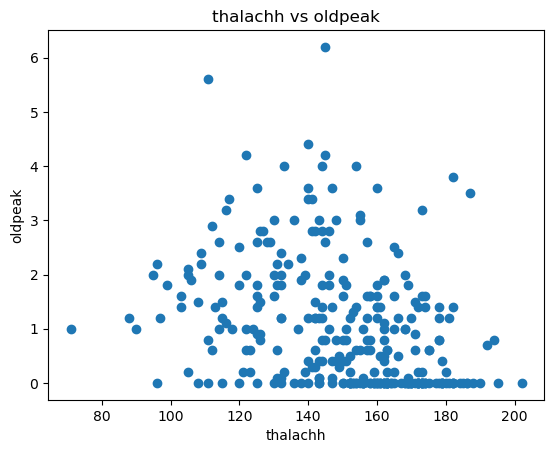

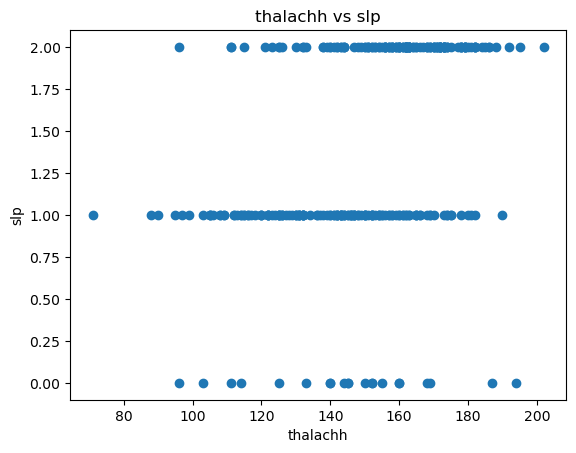

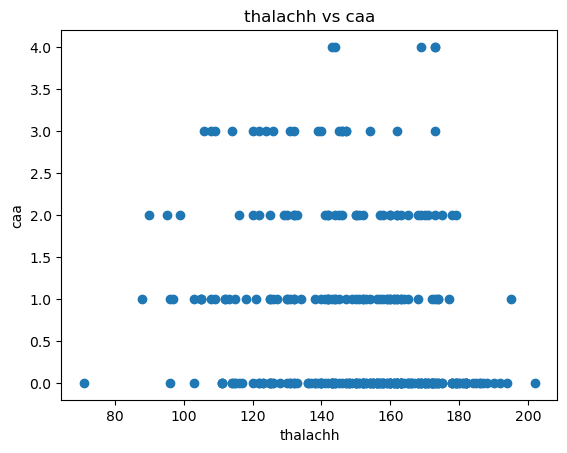

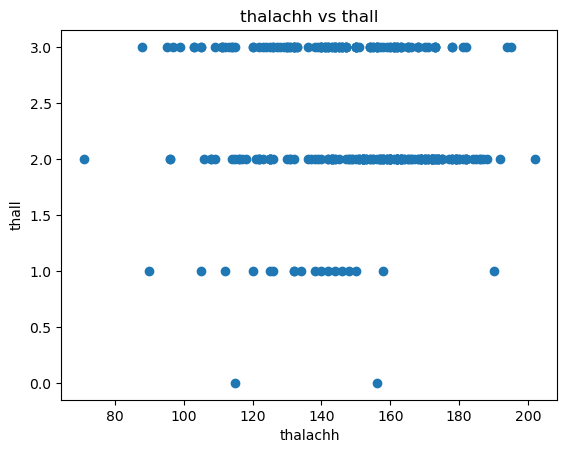

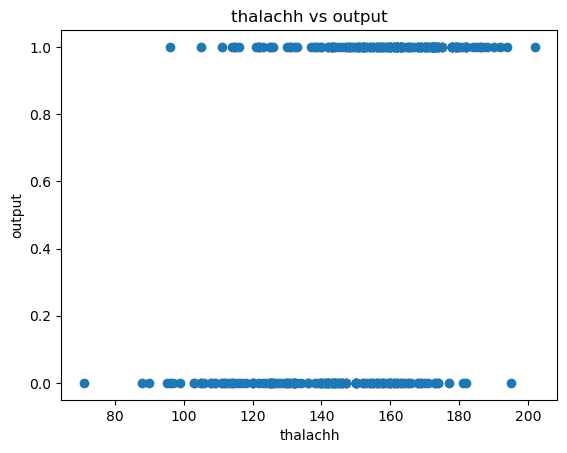

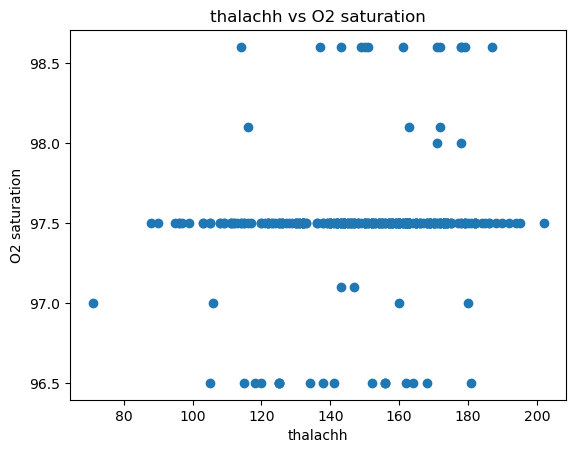

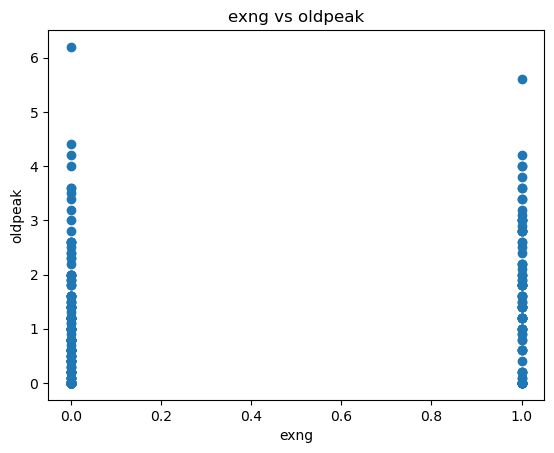

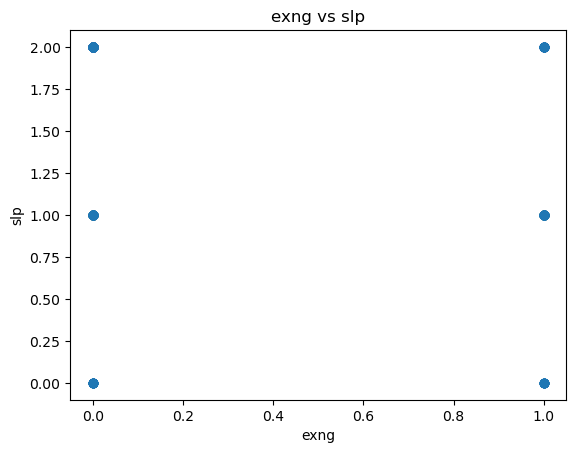

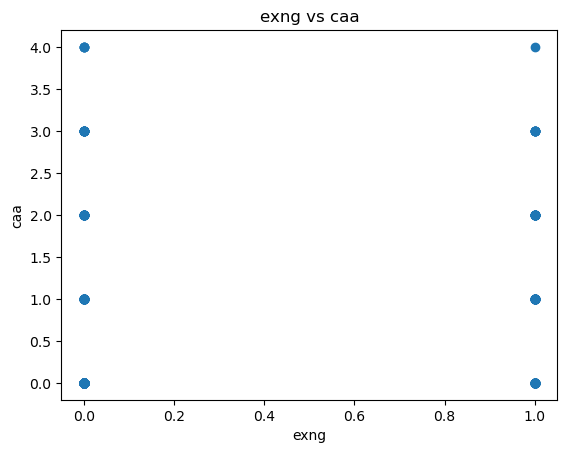

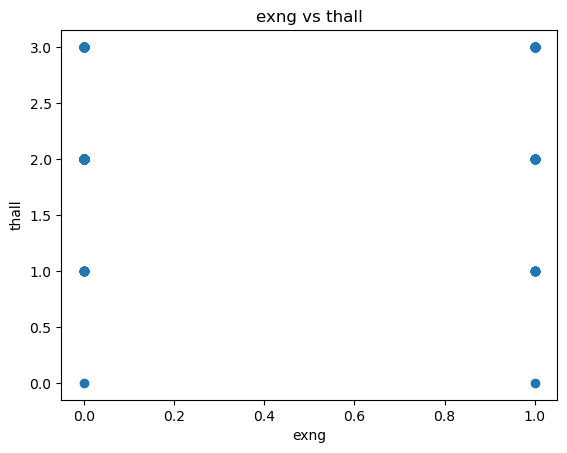

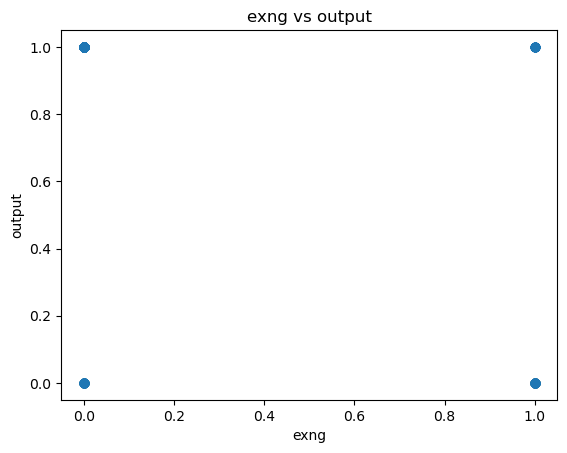

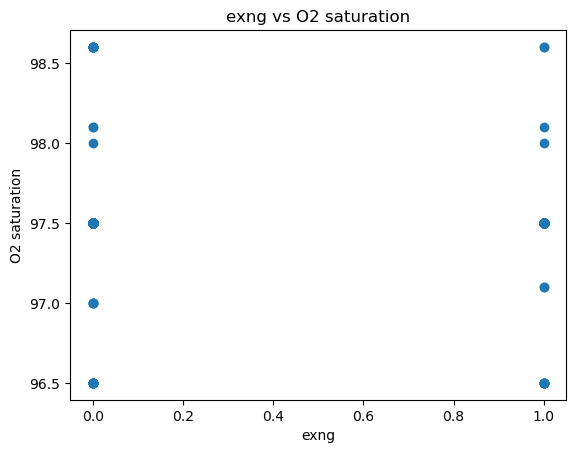

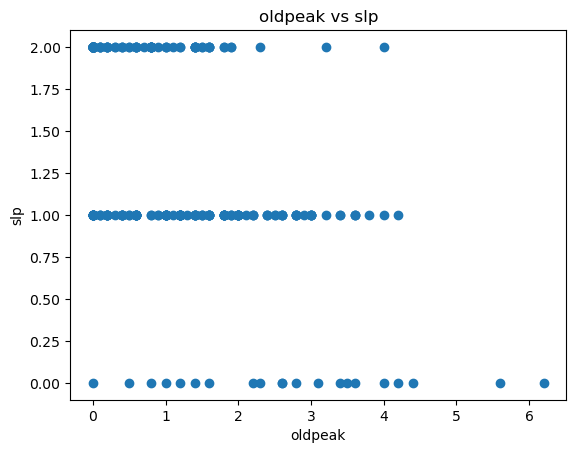

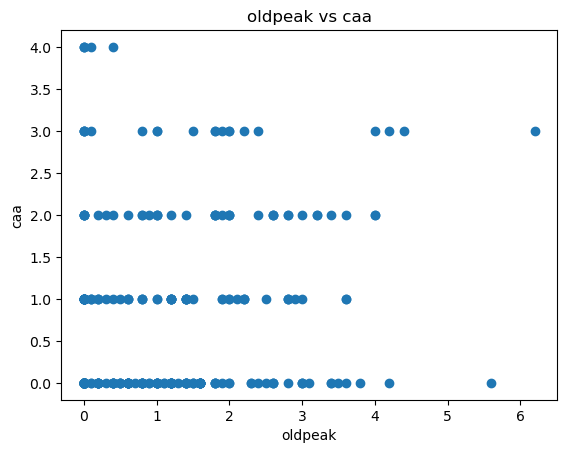

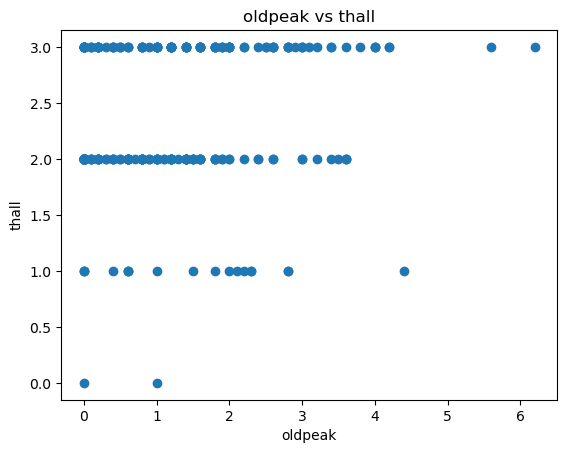

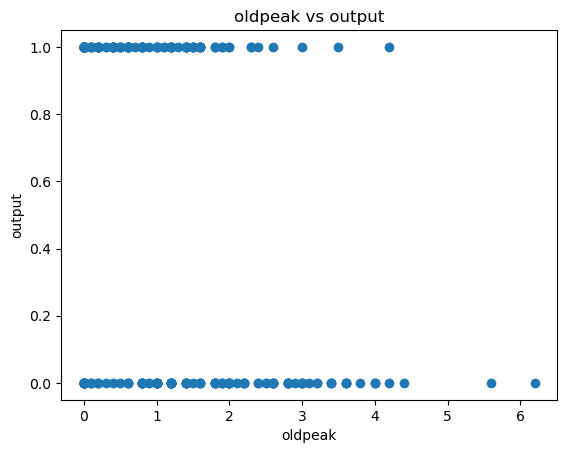

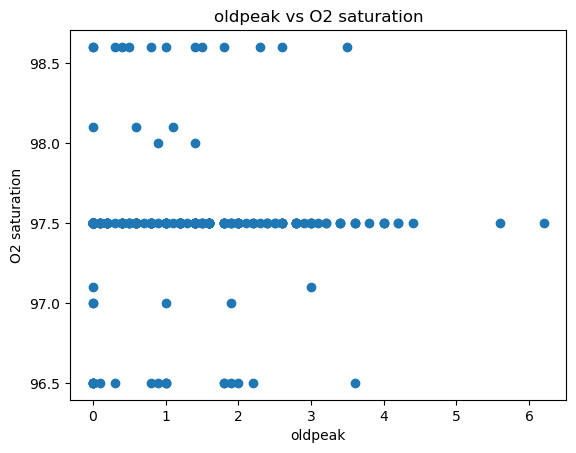

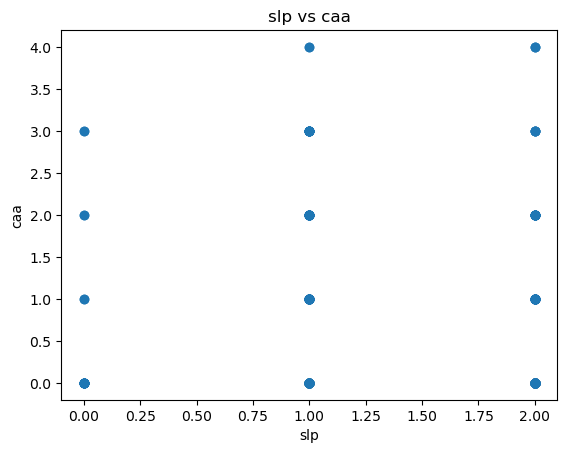

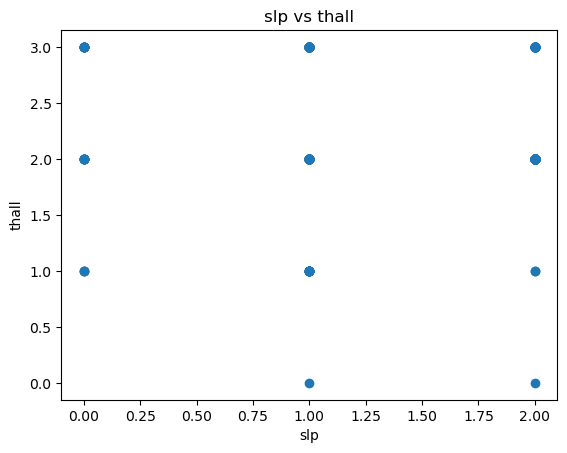

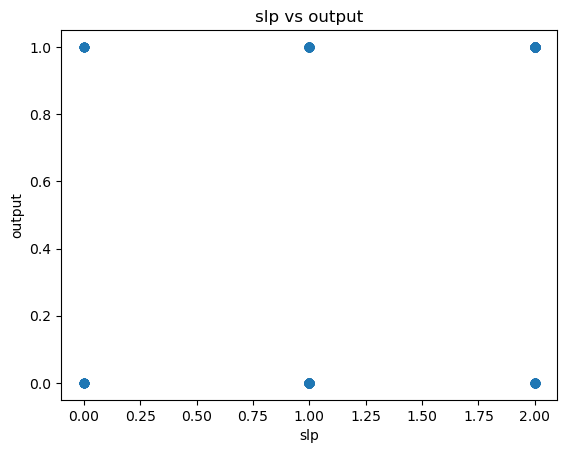

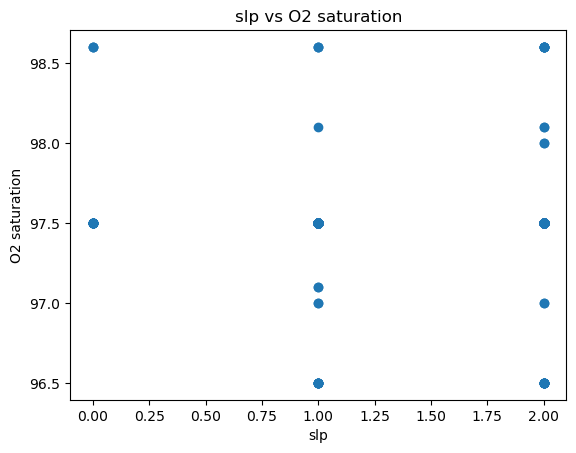

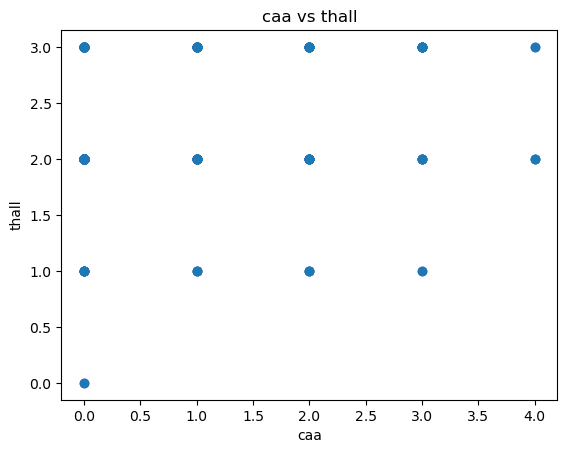

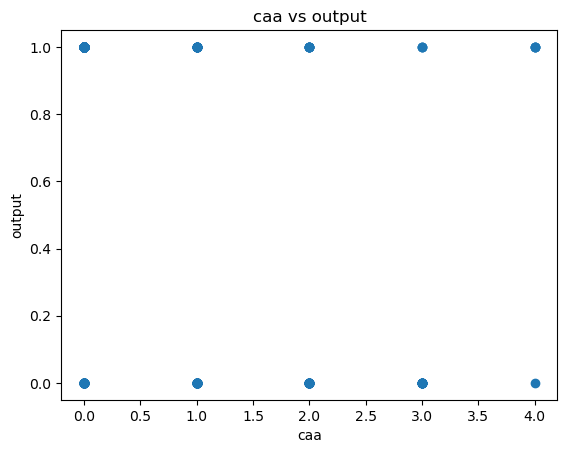

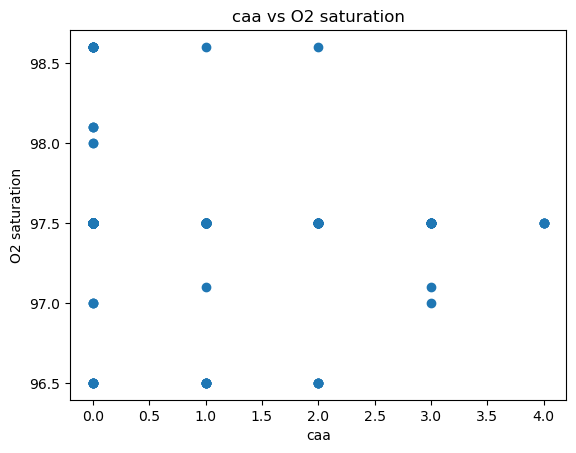

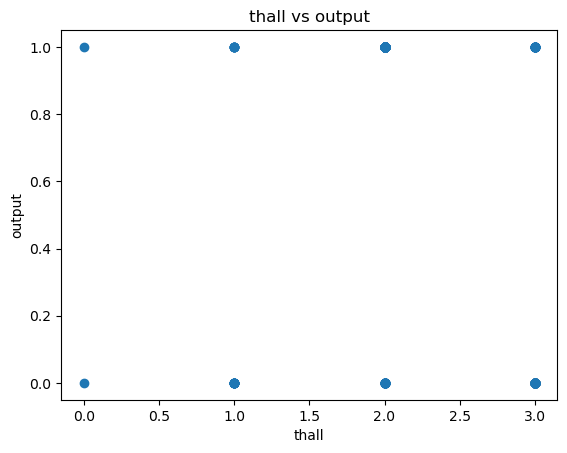

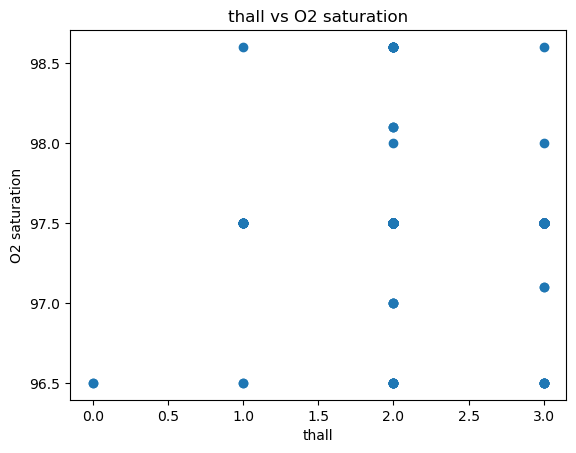

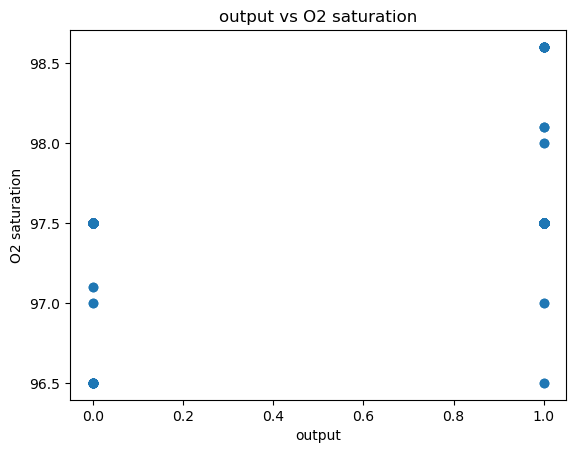

In [11]:
# Generate all possible combinations of features
feature_combinations = [(x, y) for i, x in enumerate(df.columns) for j, y in enumerate(df.columns) if i < j]

# Plot each feature combination
for feature_x, feature_y in feature_combinations:
    plt.scatter(df[feature_x], df[feature_y])
    plt.xlabel(feature_x)
    plt.ylabel(feature_y)
    plt.title(f"{feature_x} vs {feature_y}")
    plt.show()


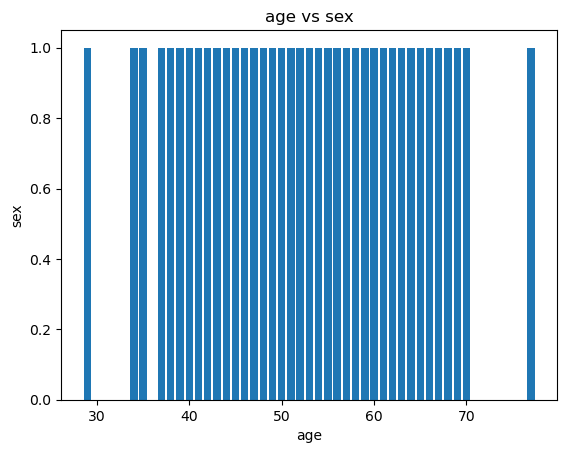

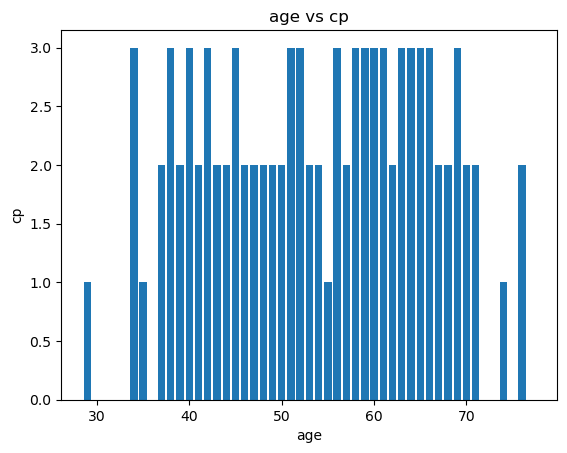

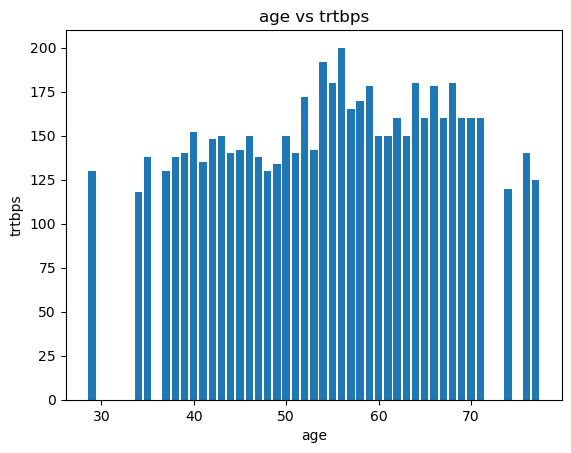

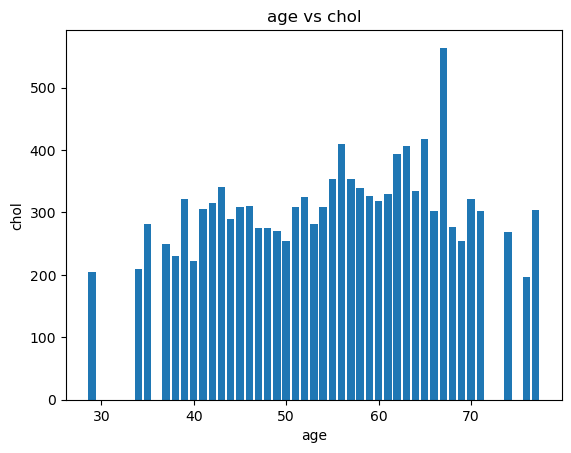

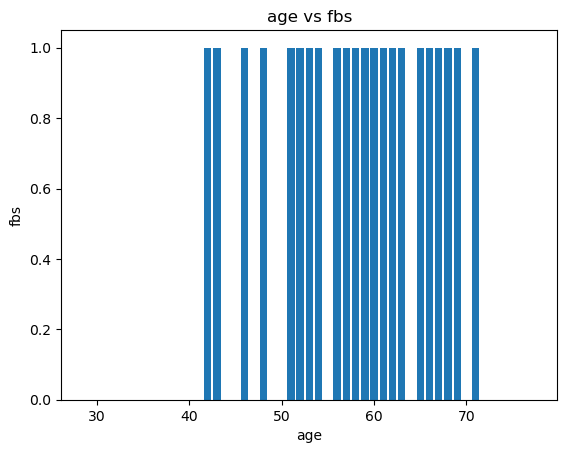

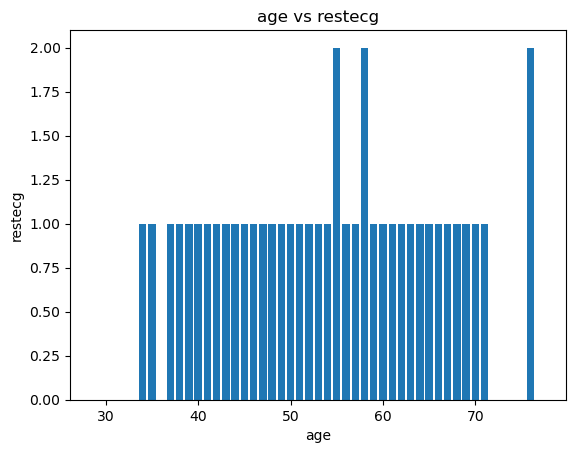

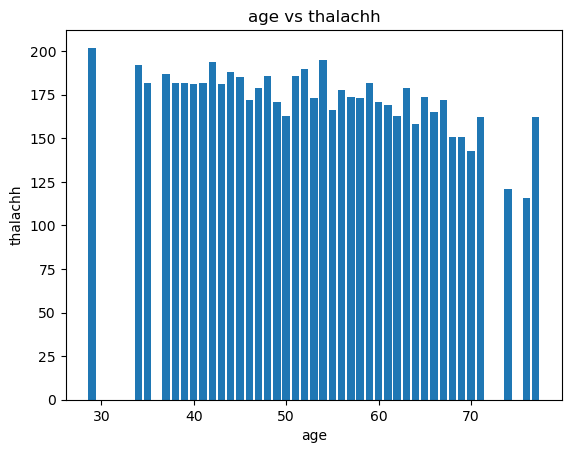

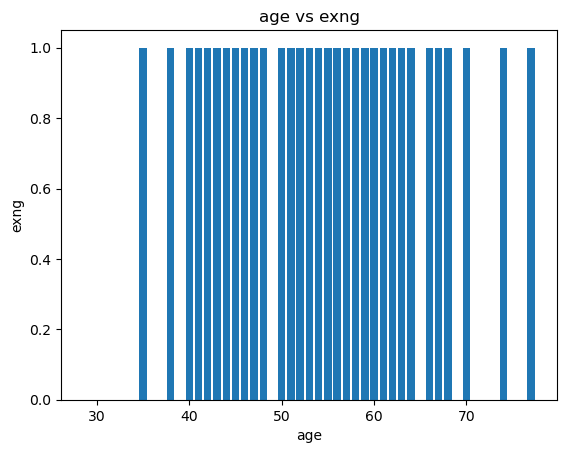

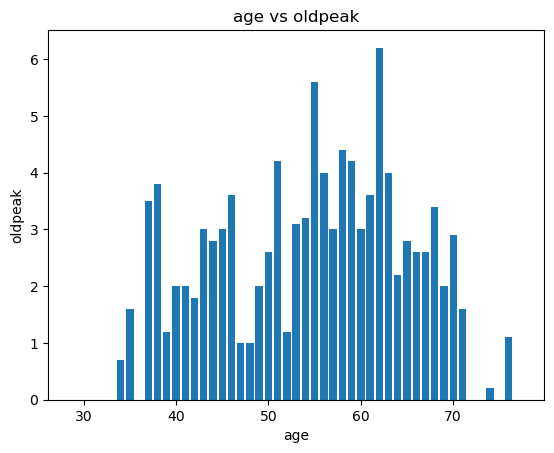

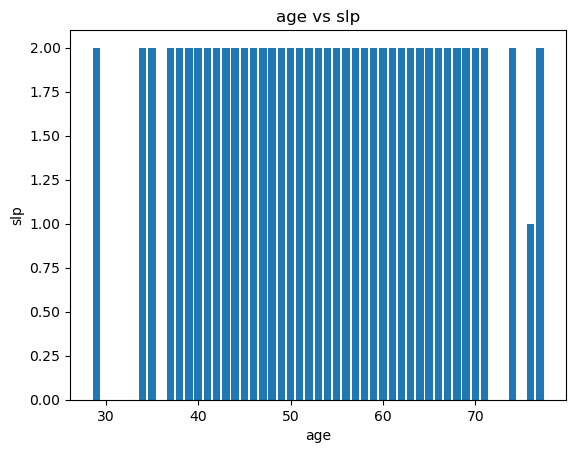

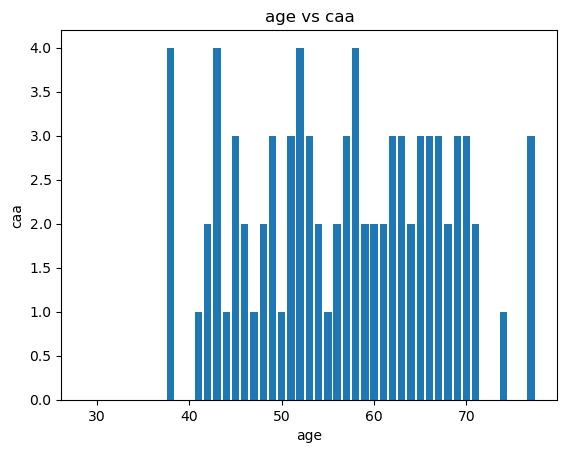

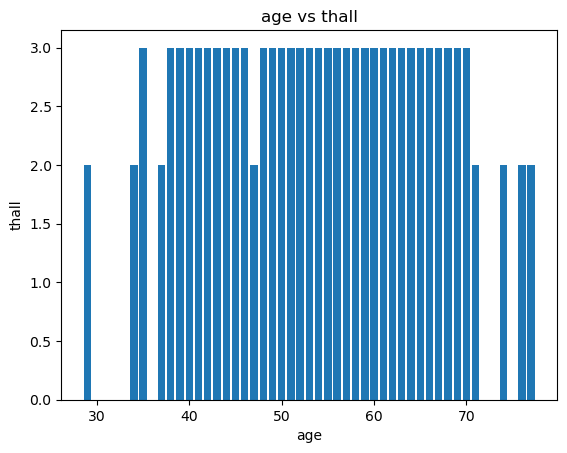

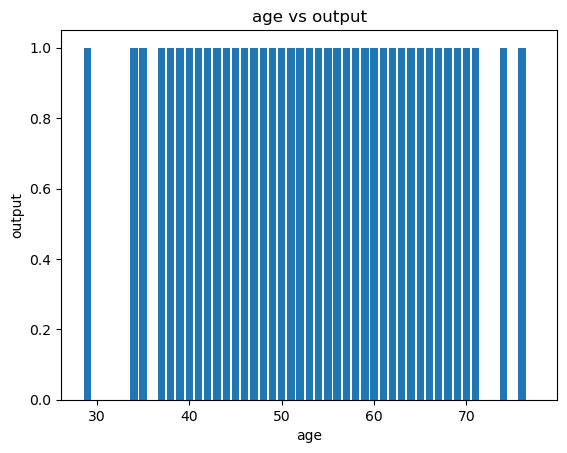

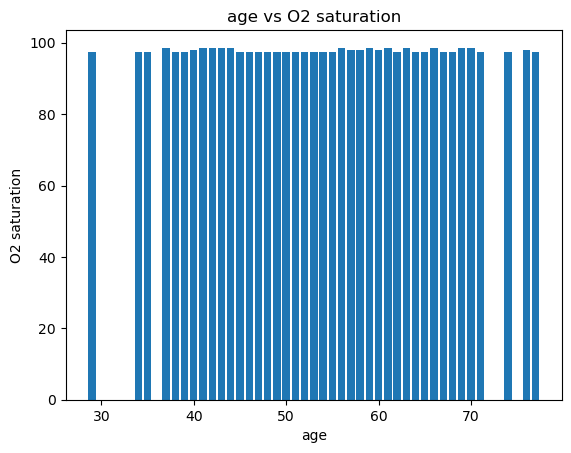

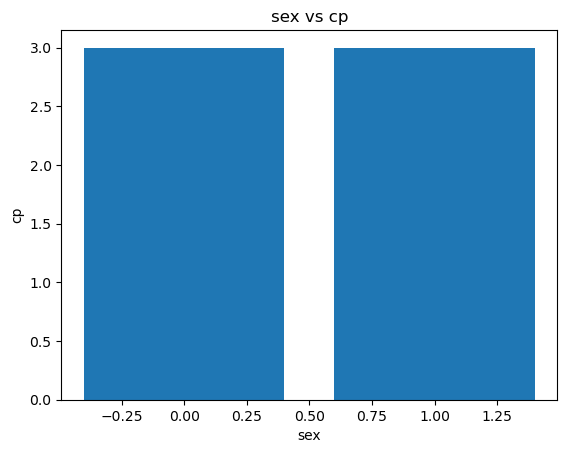

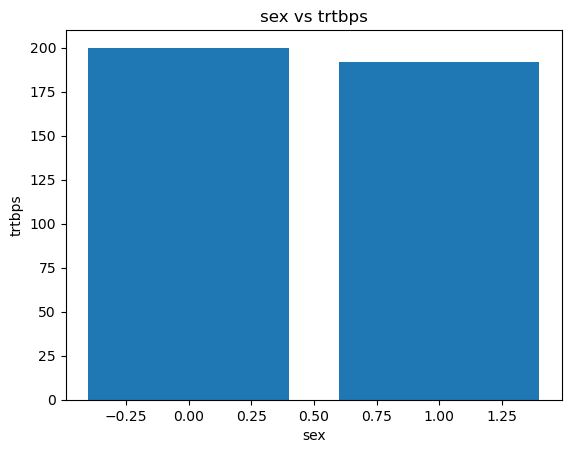

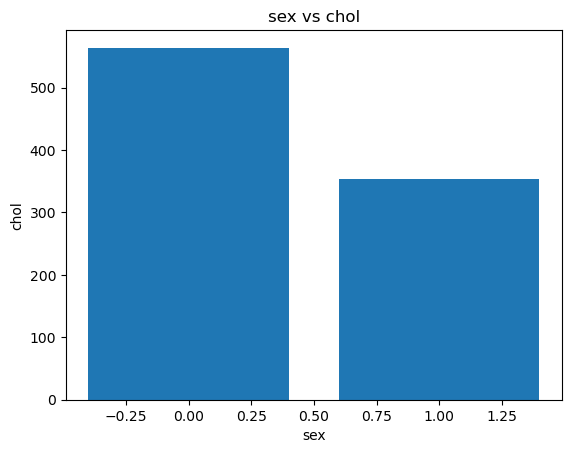

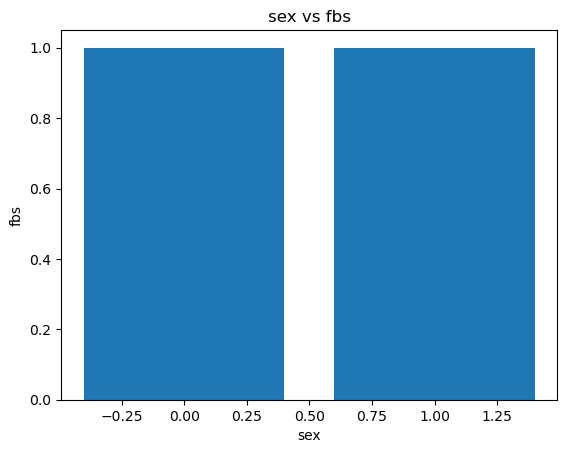

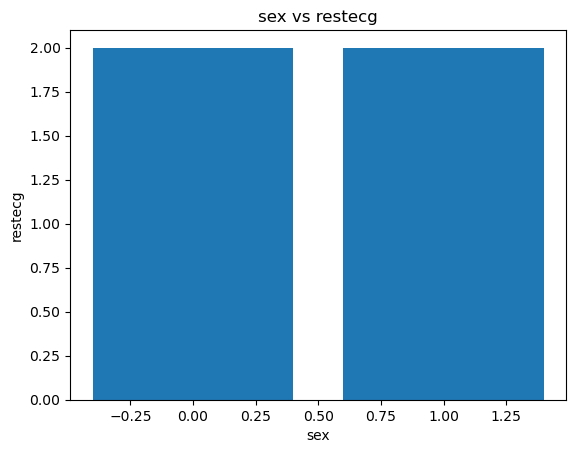

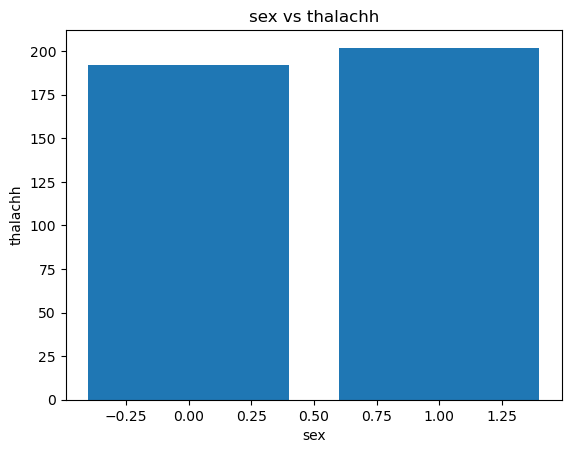

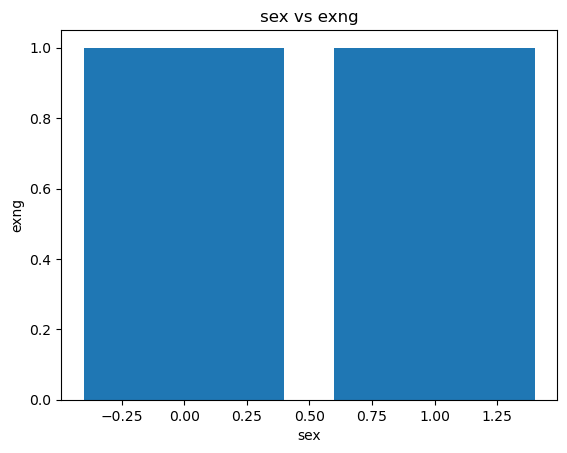

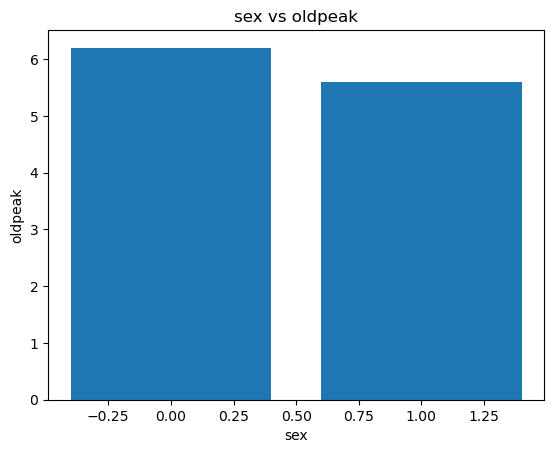

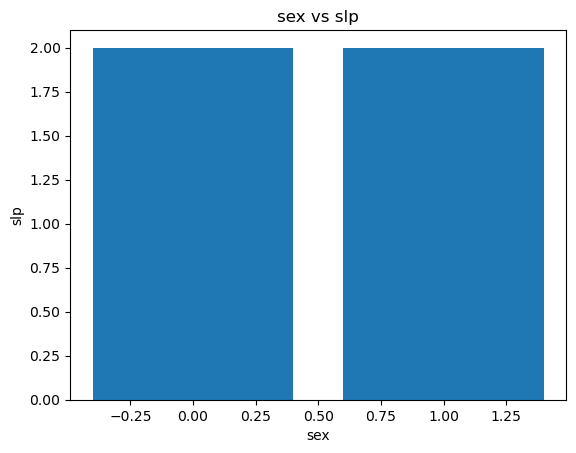

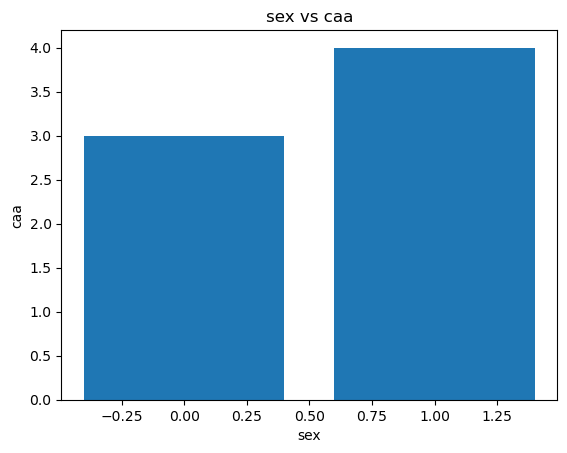

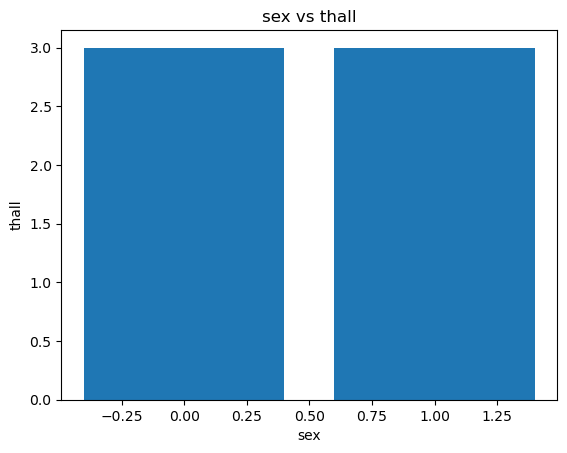

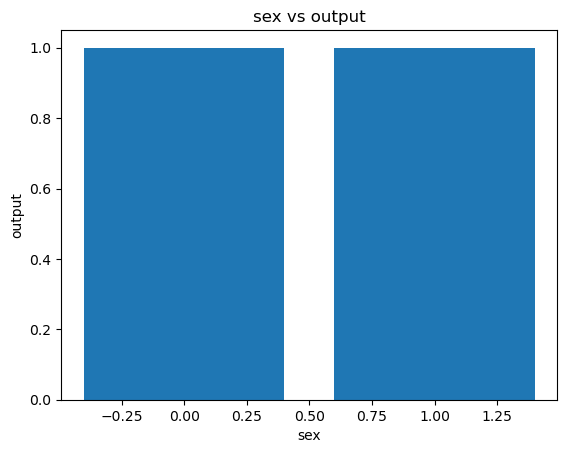

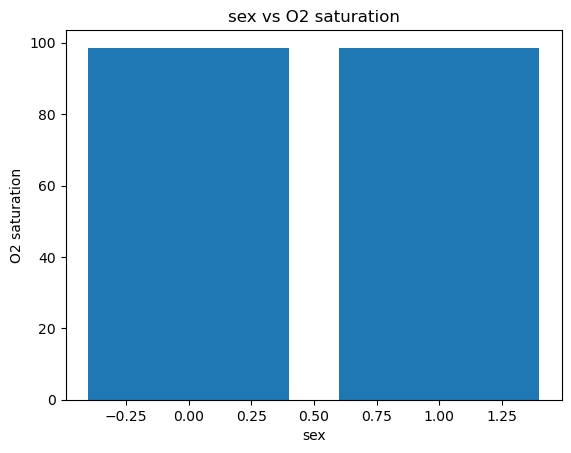

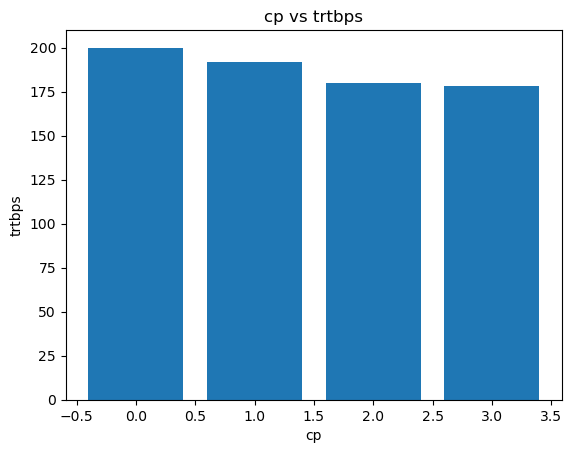

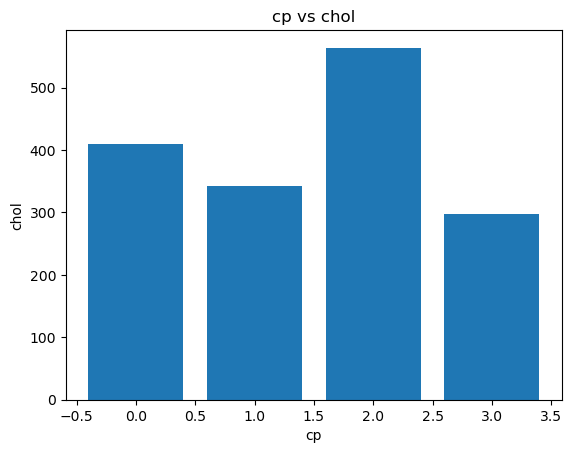

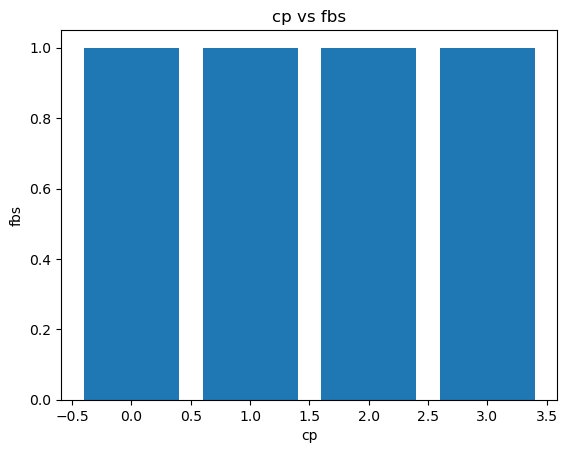

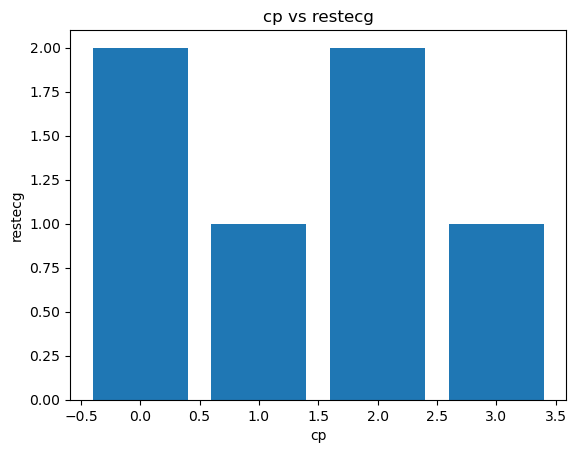

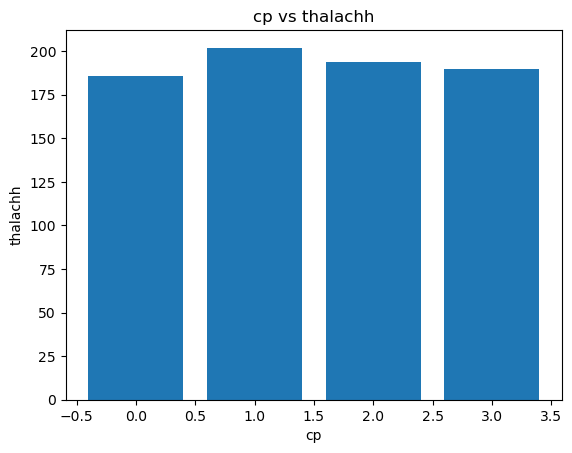

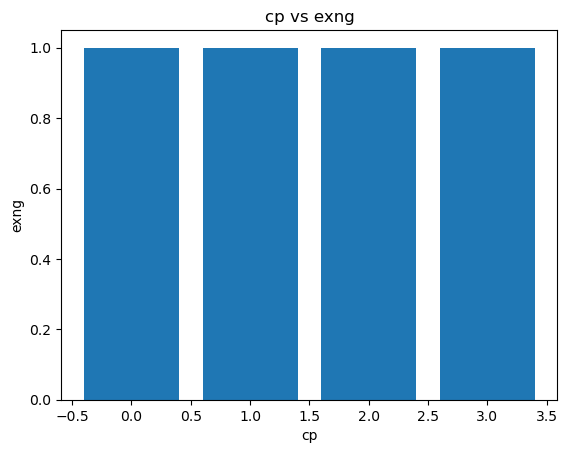

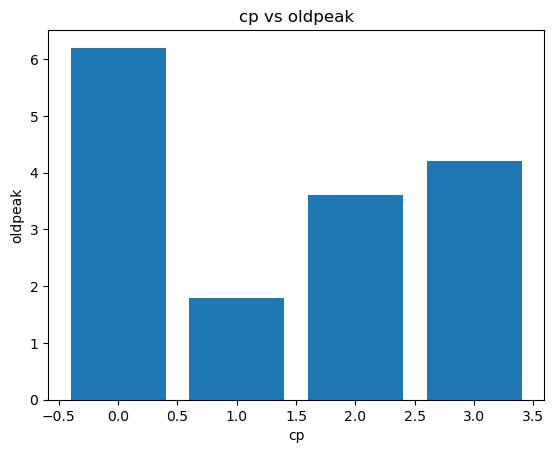

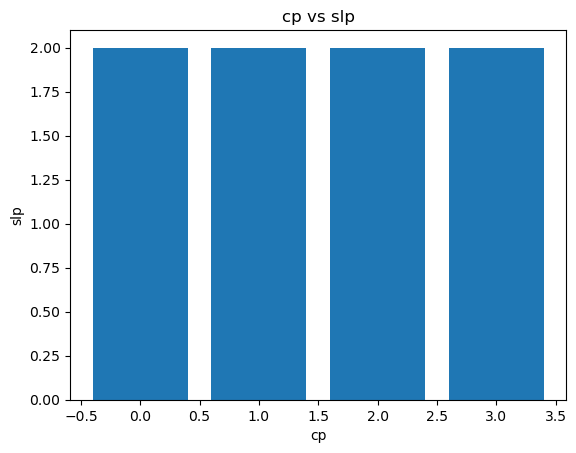

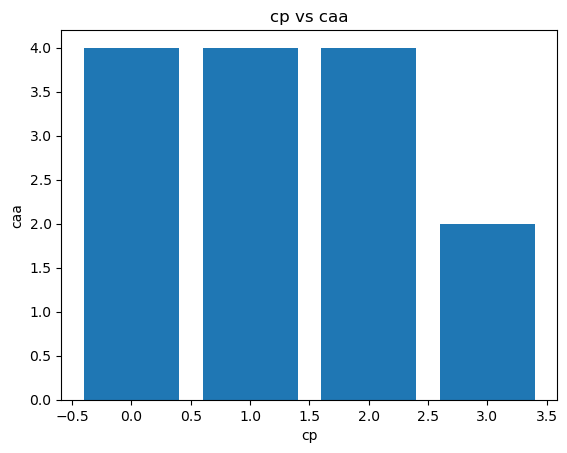

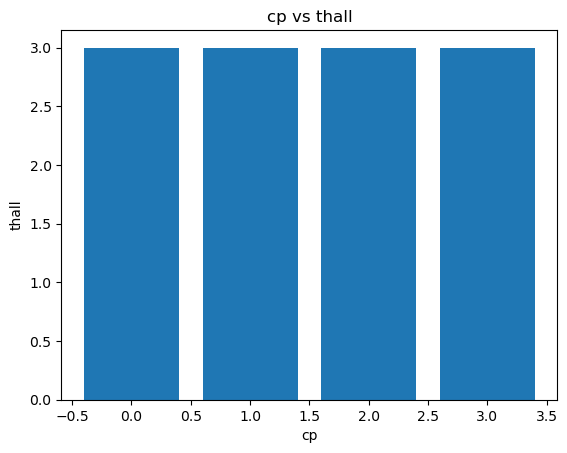

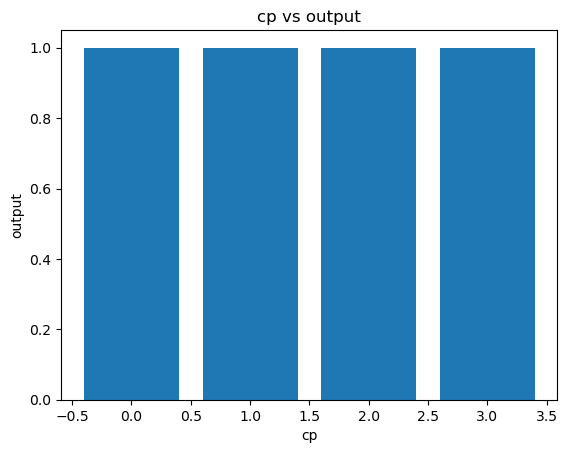

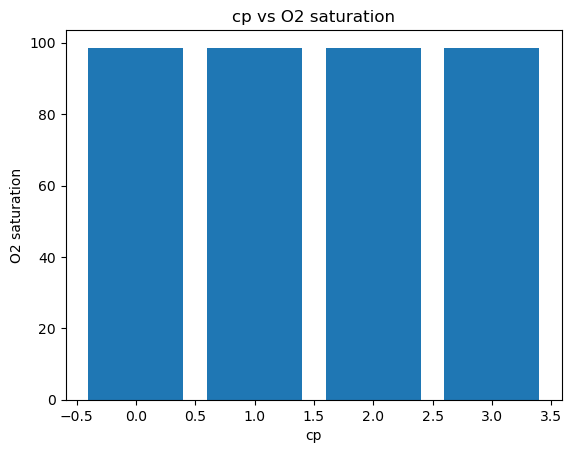

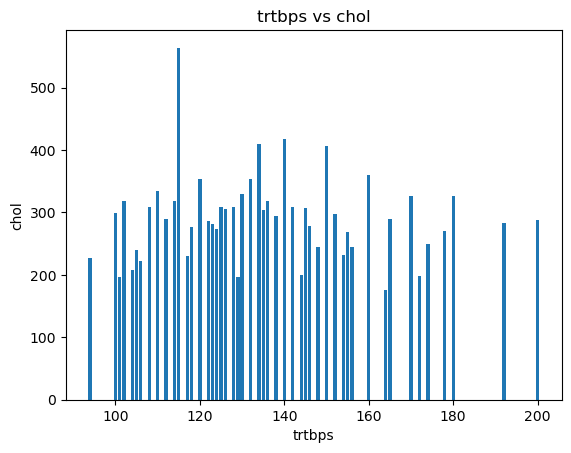

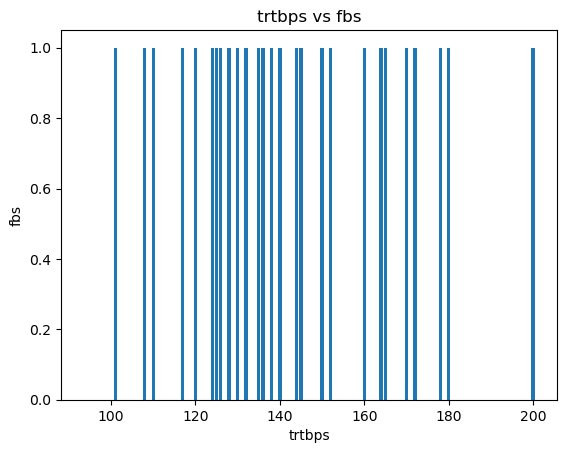

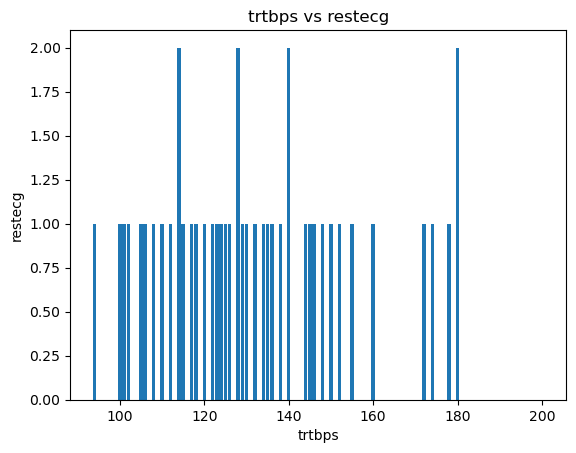

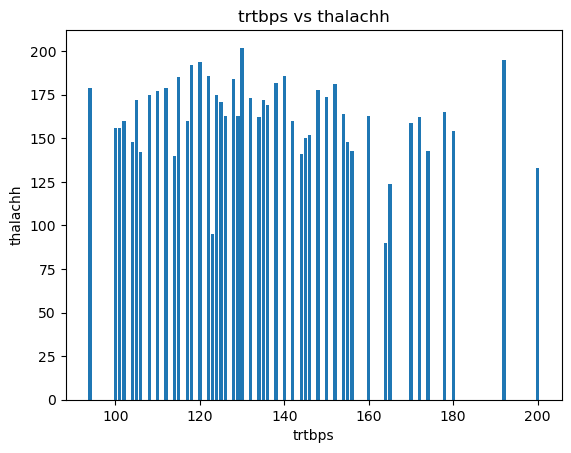

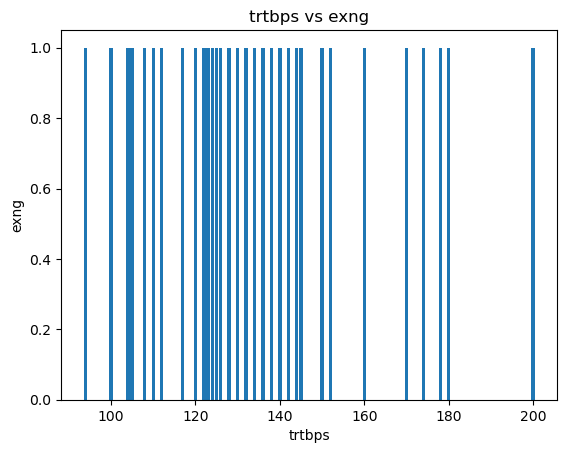

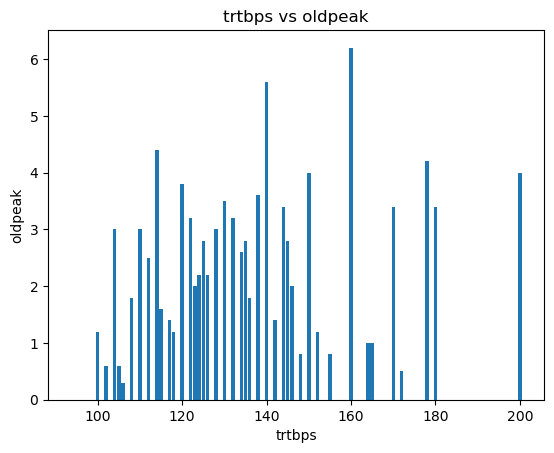

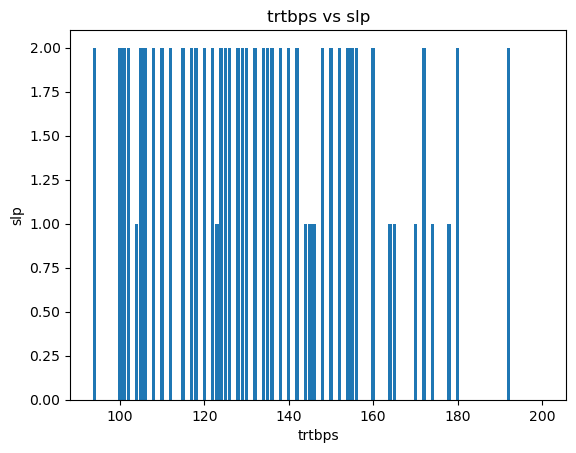

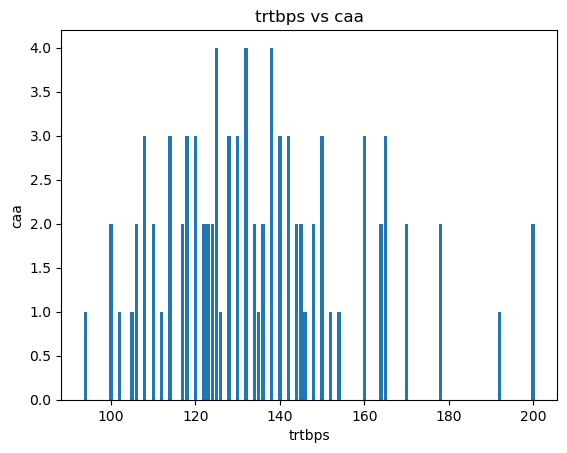

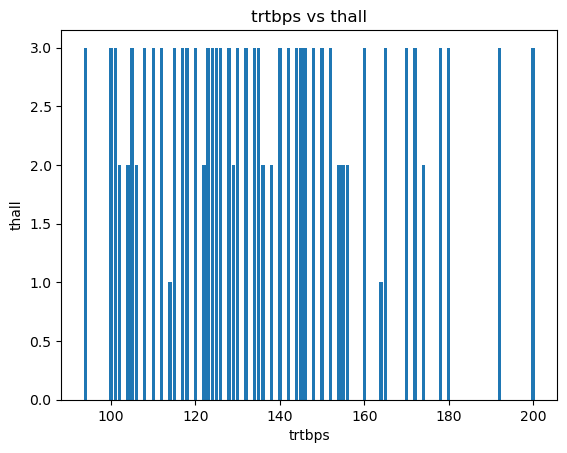

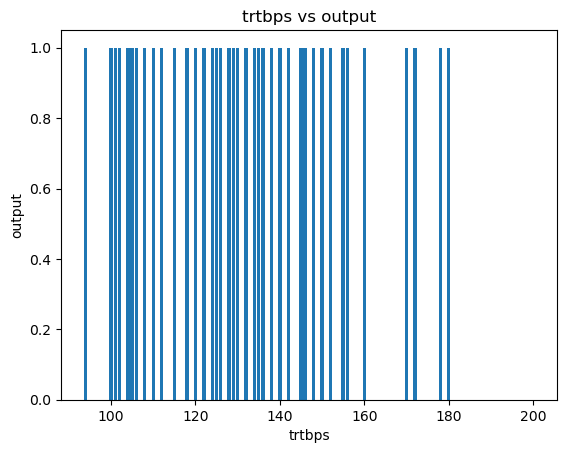

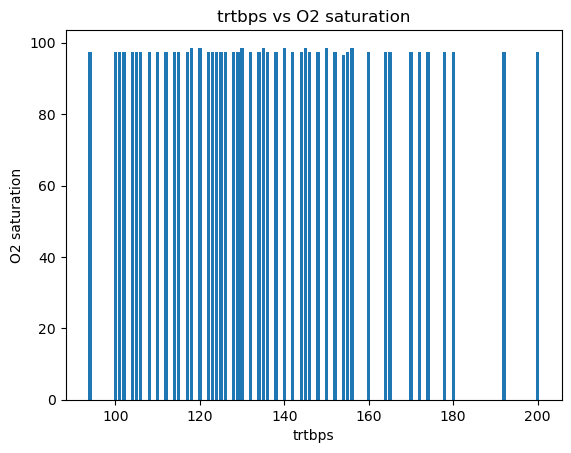

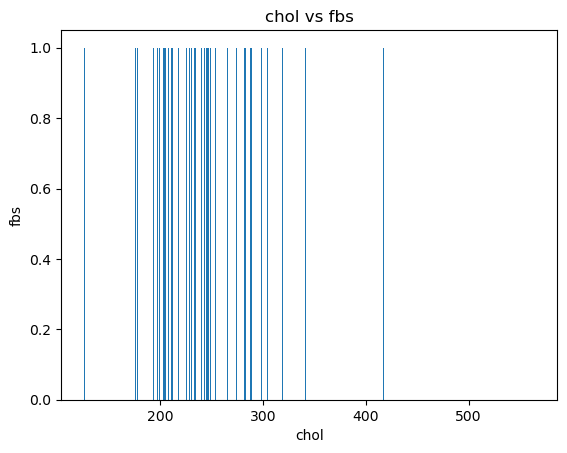

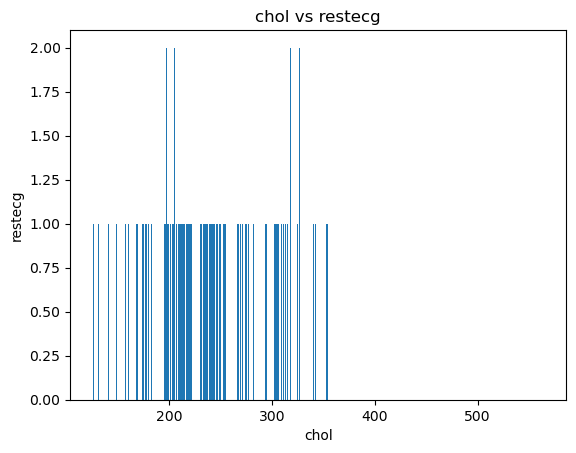

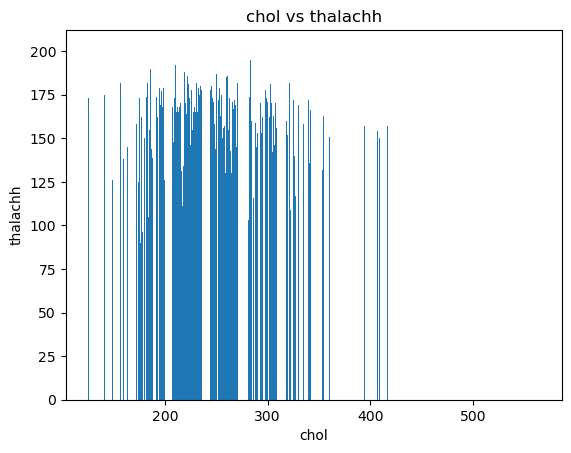

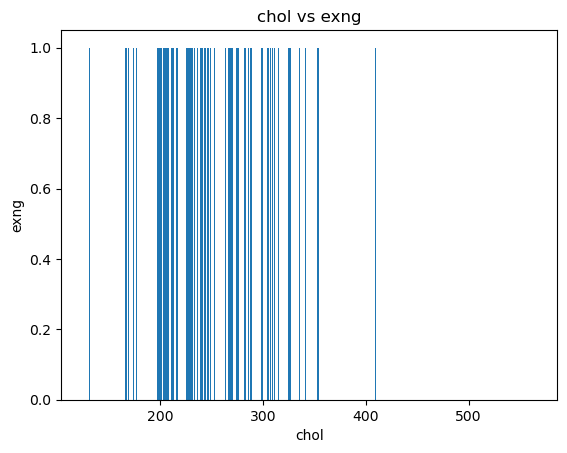

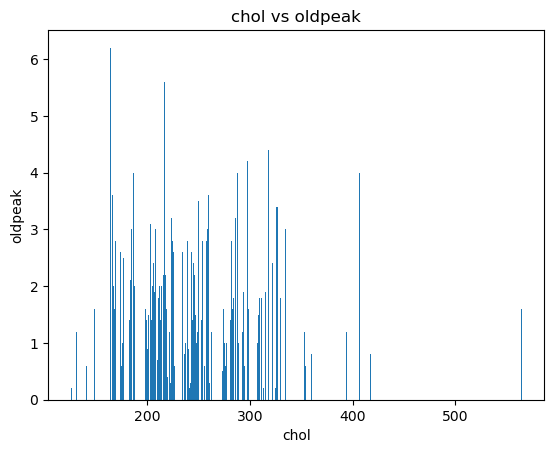

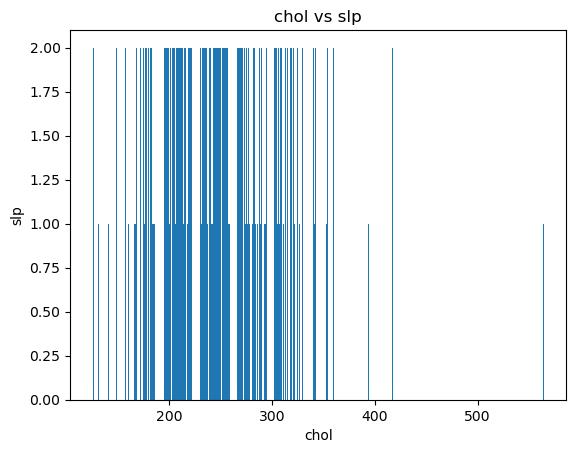

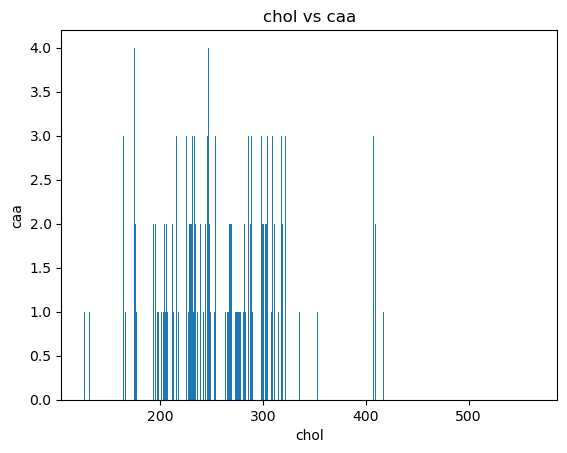

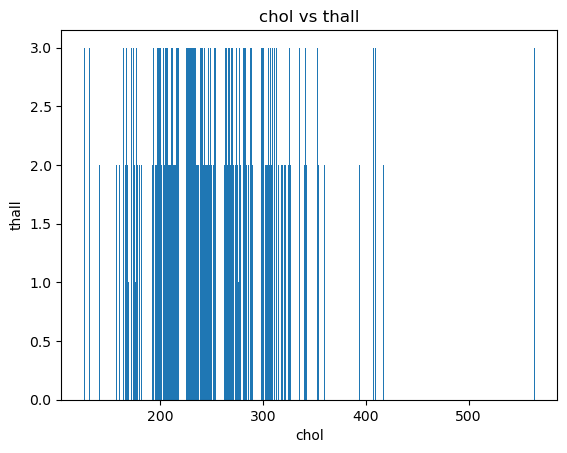

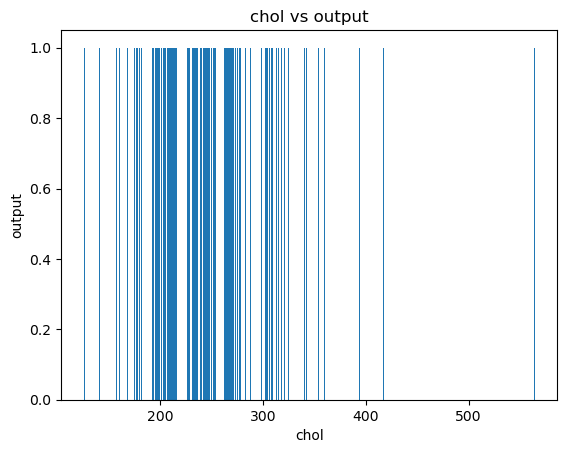

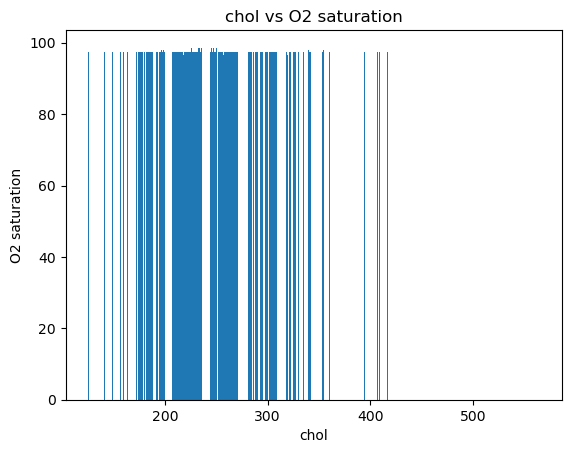

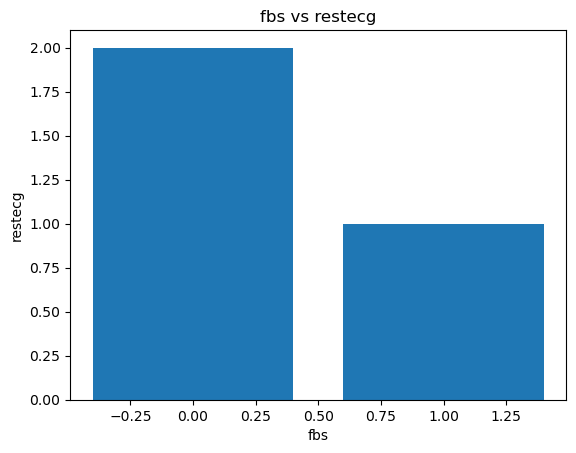

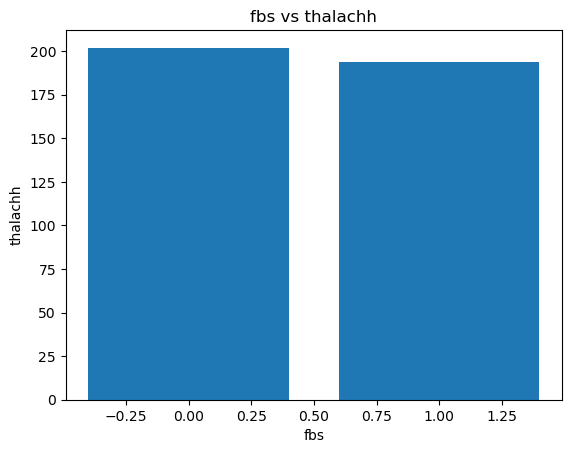

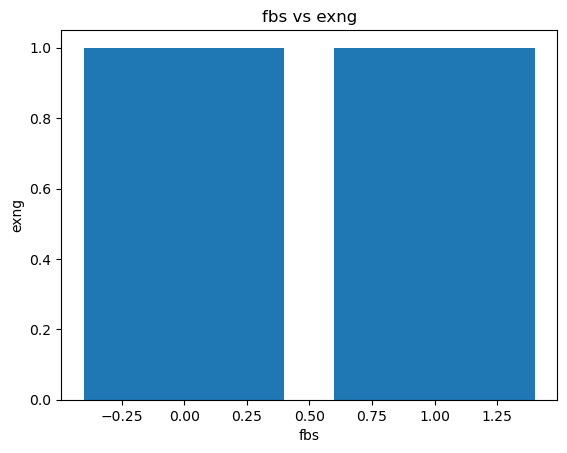

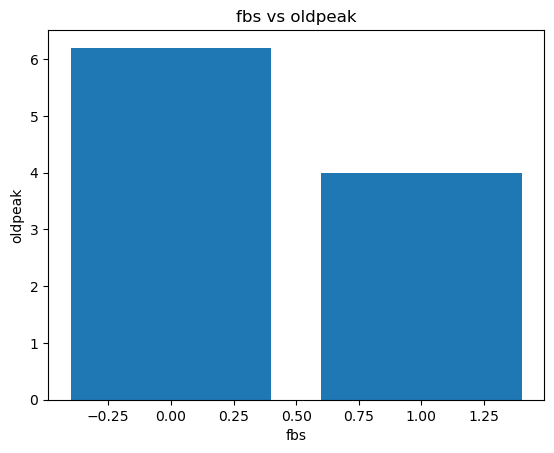

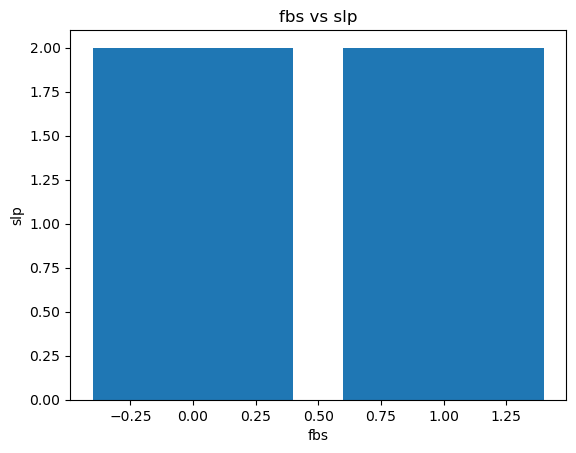

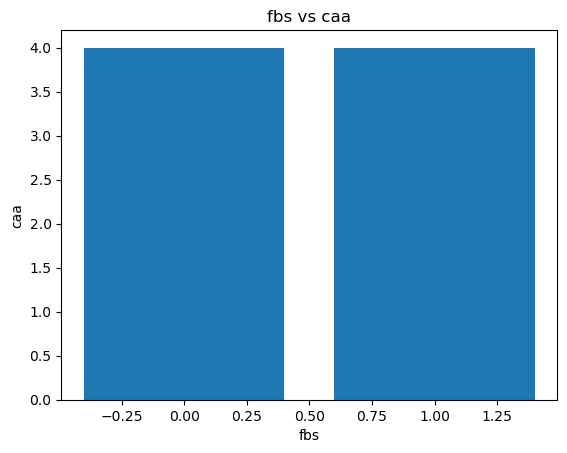

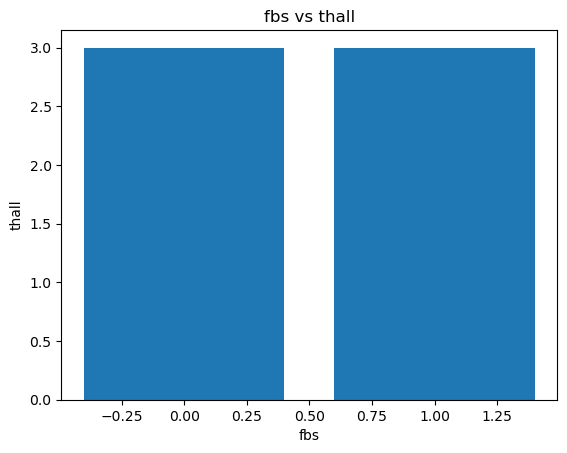

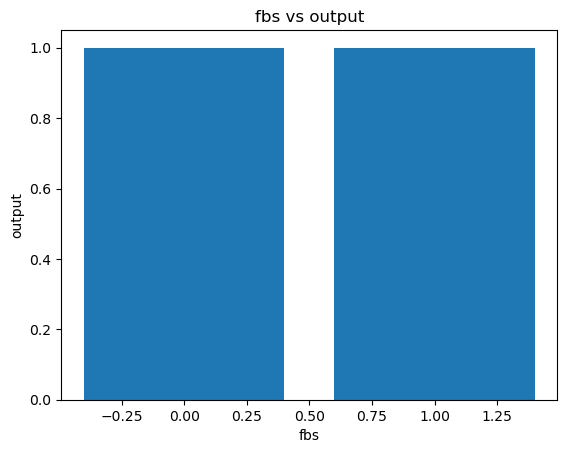

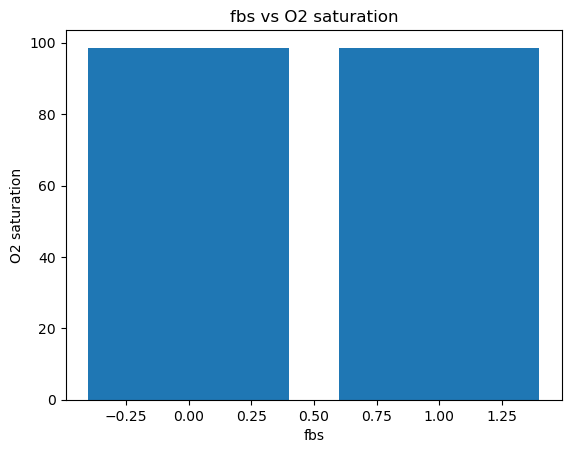

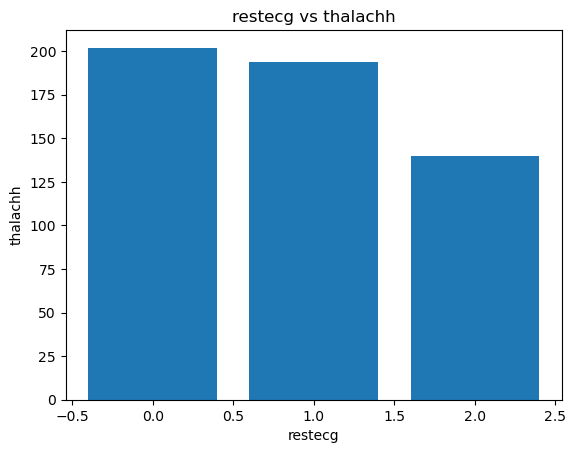

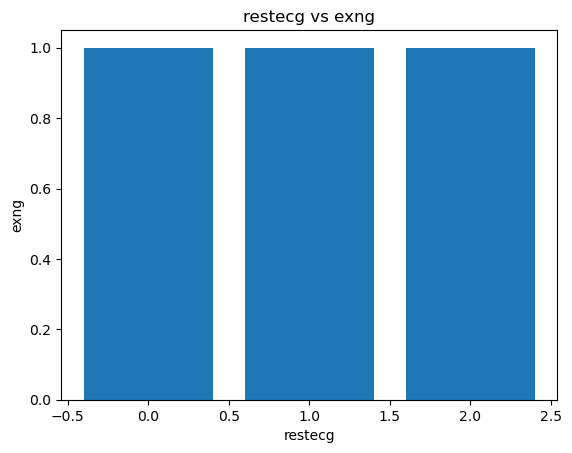

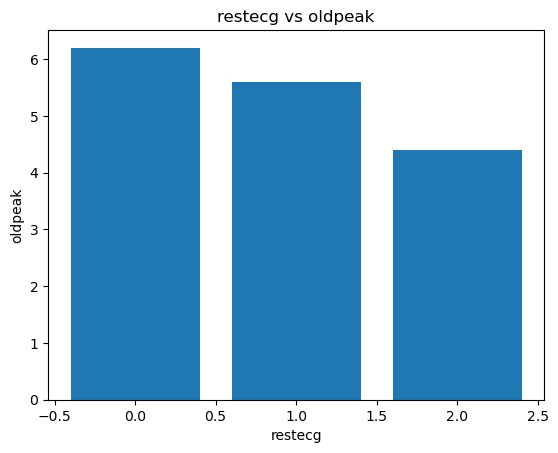

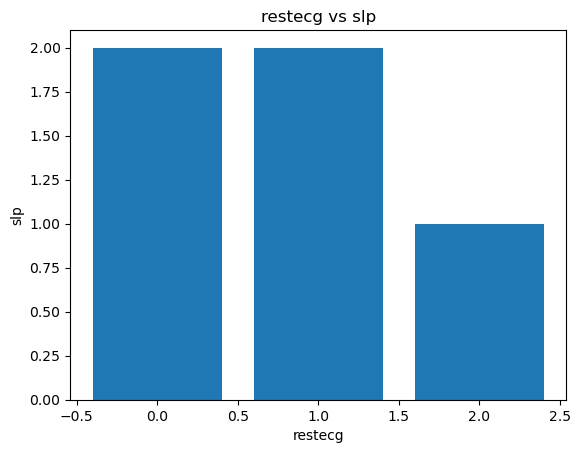

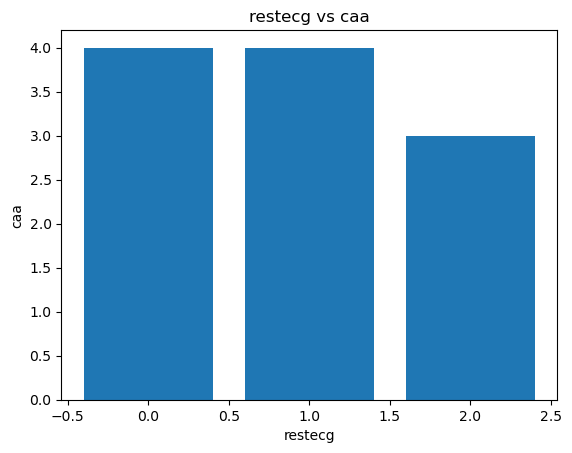

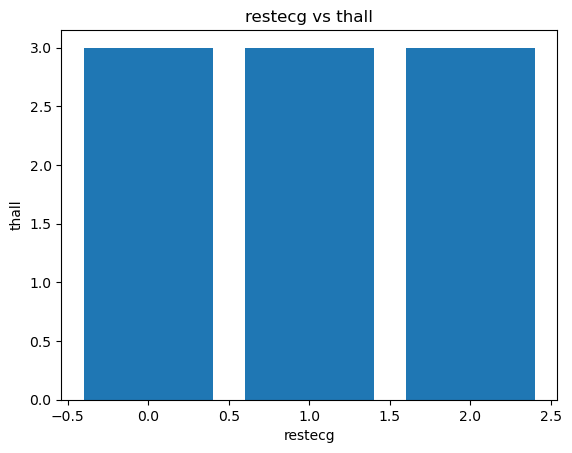

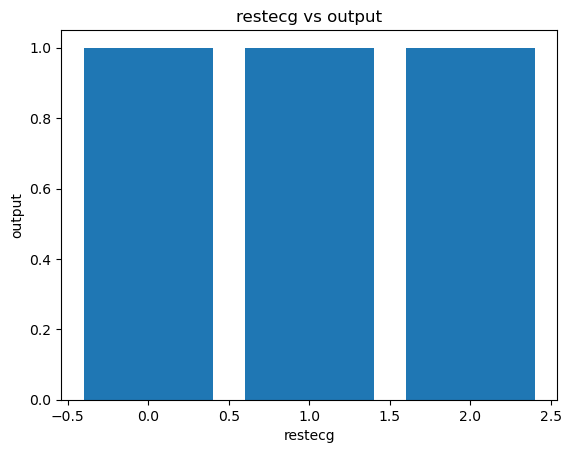

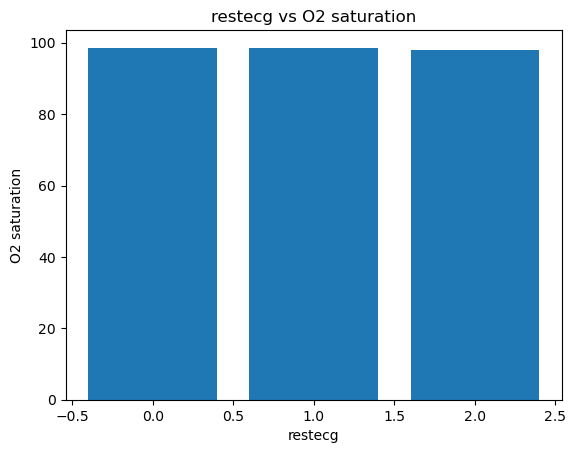

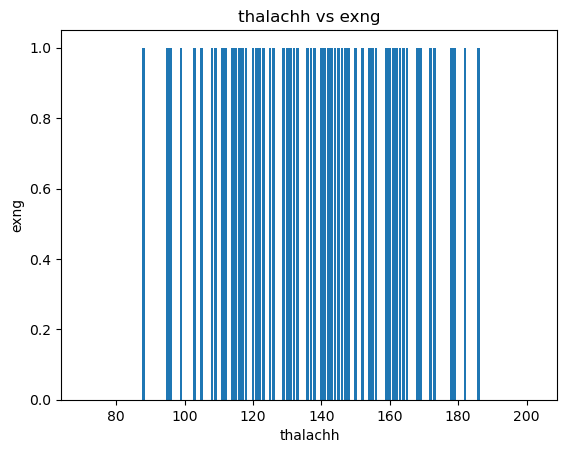

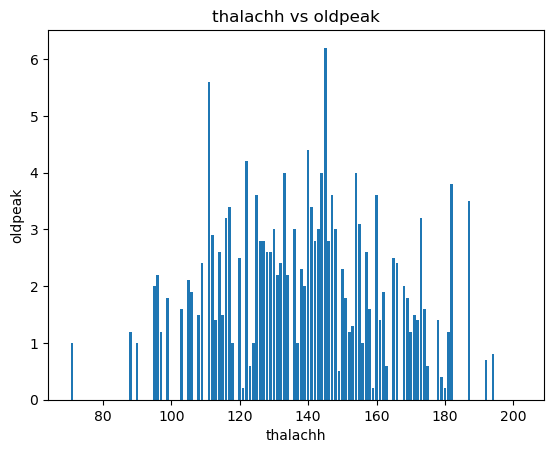

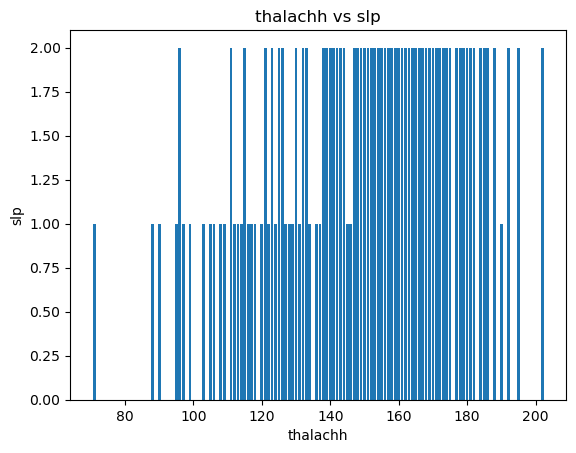

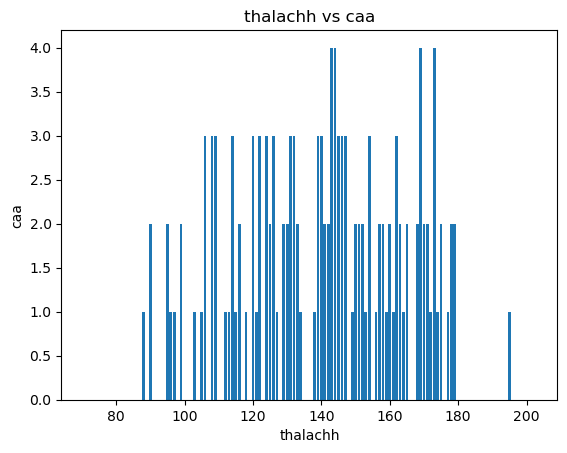

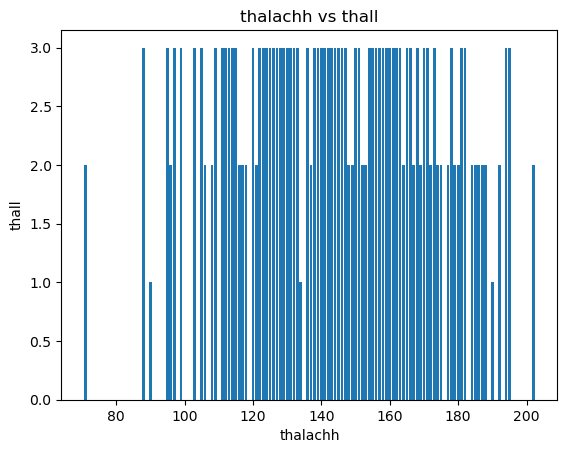

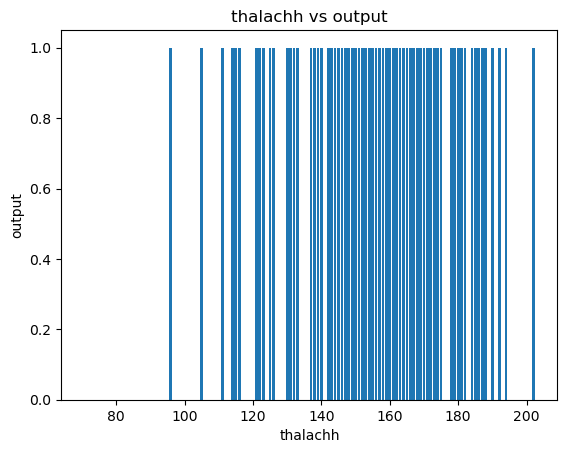

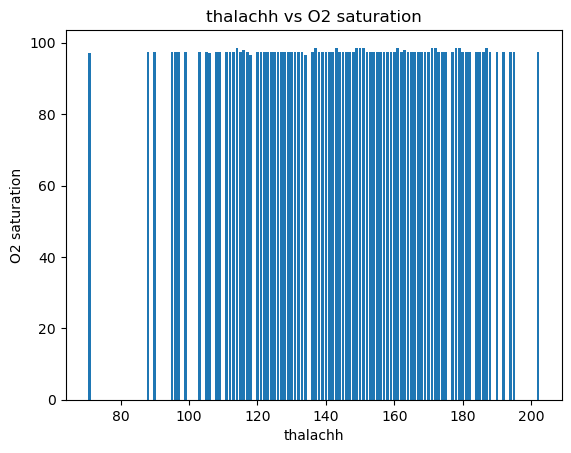

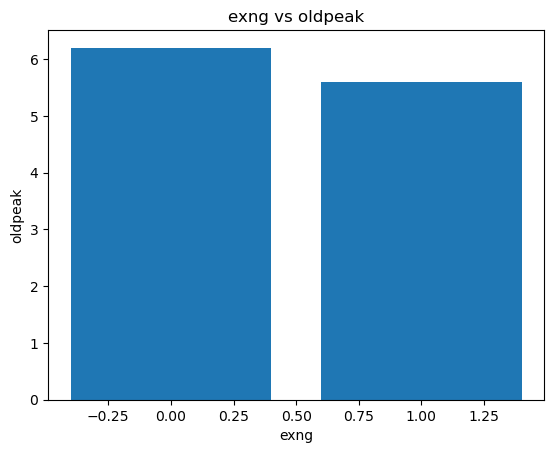

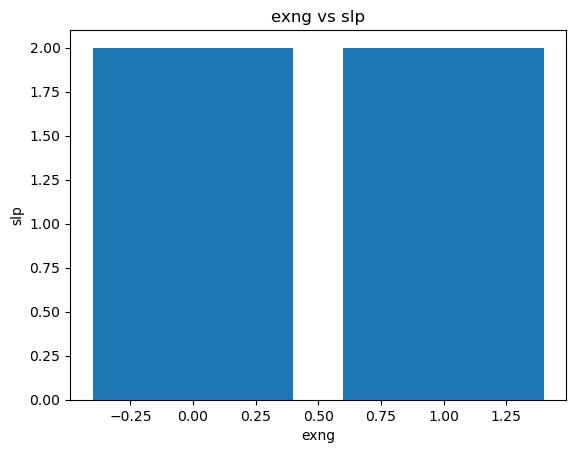

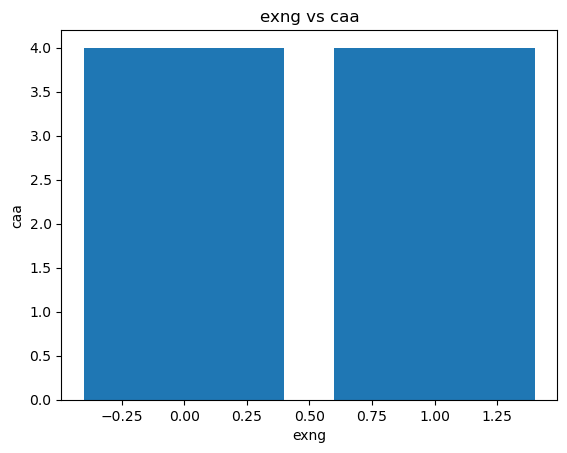

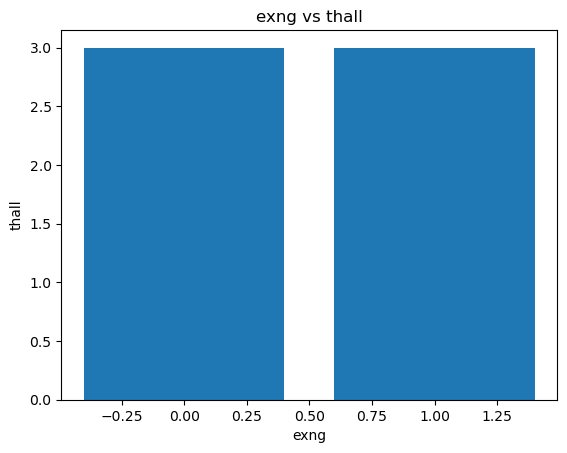

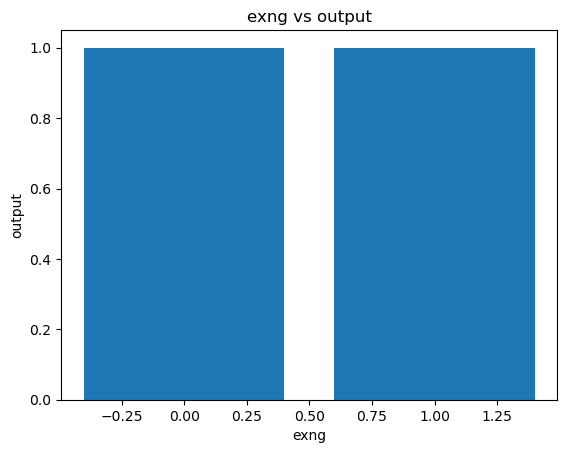

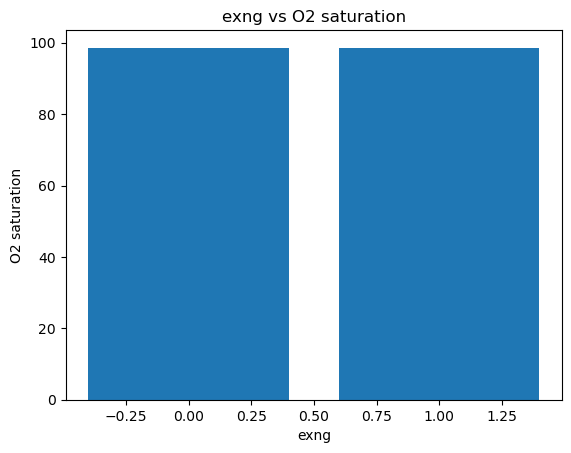

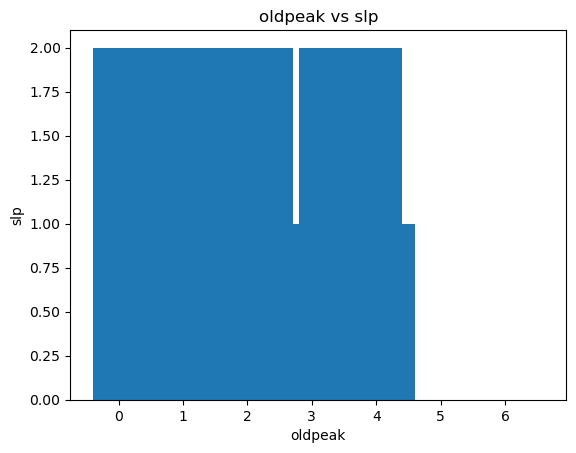

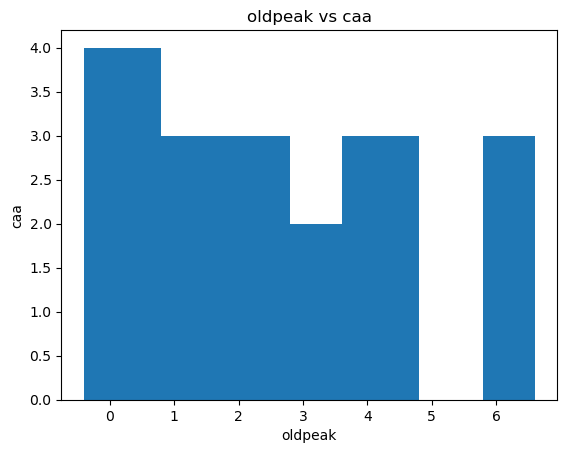

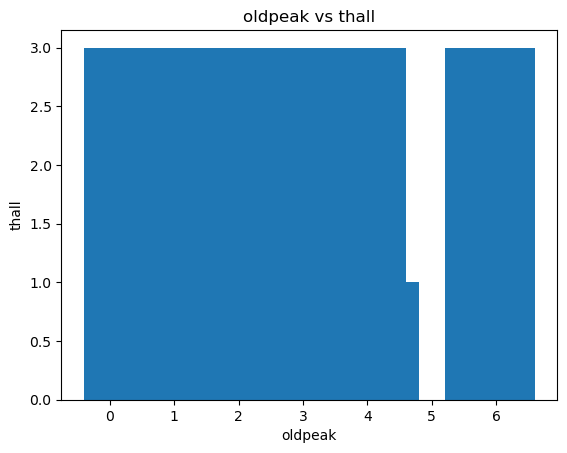

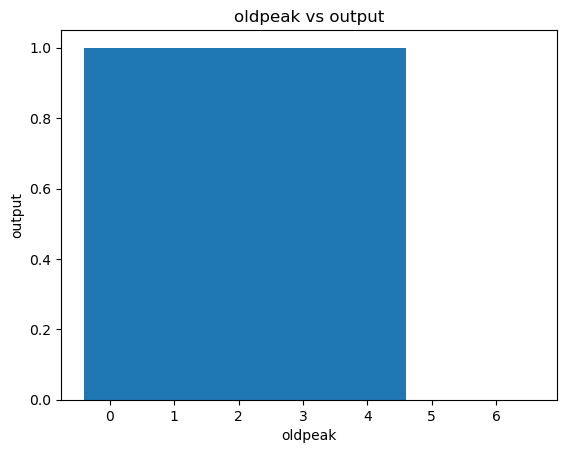

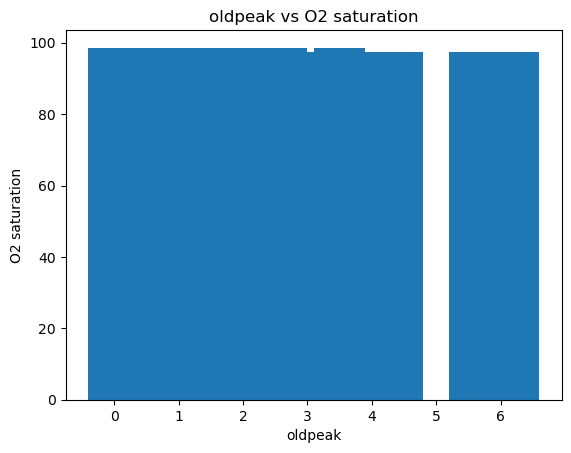

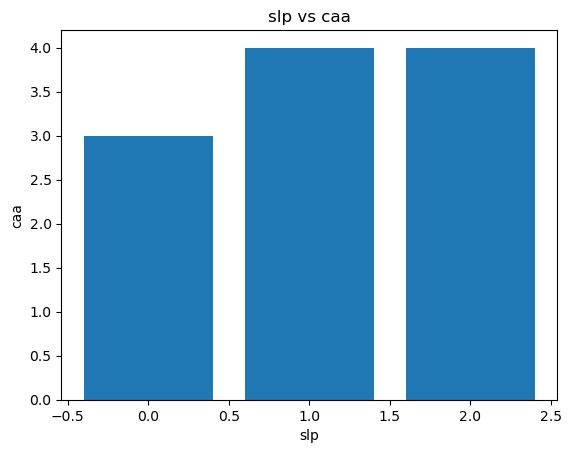

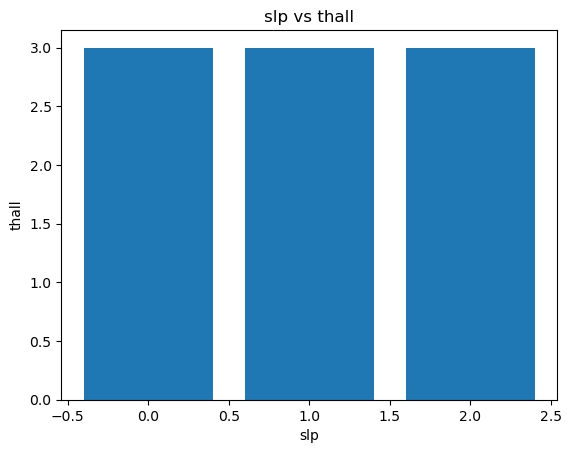

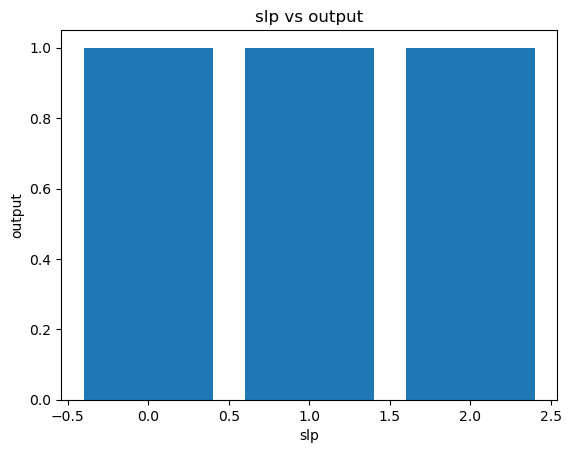

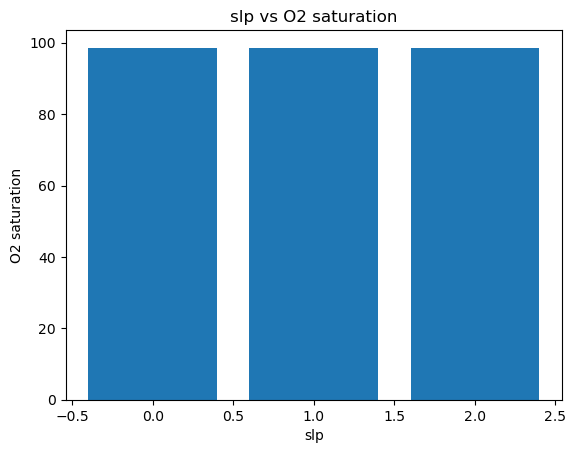

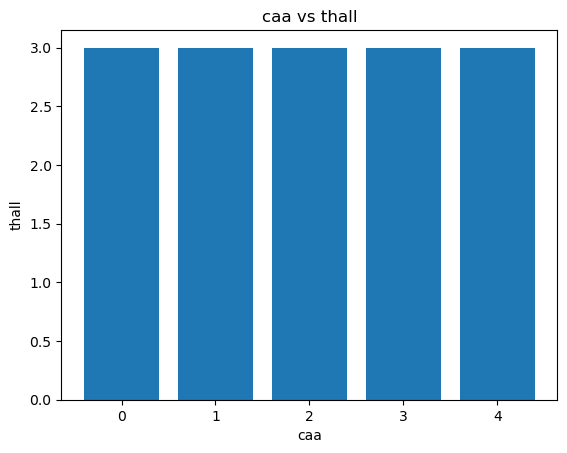

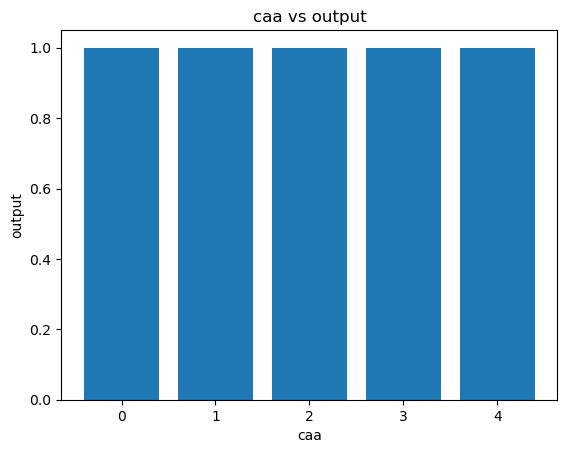

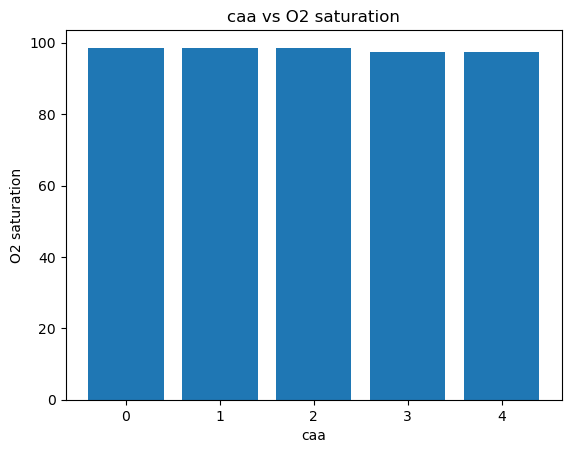

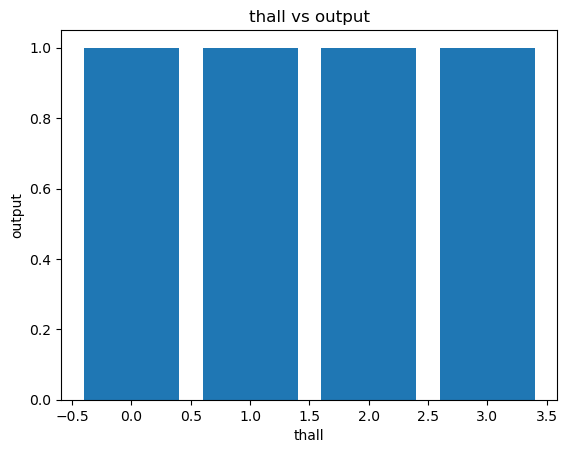

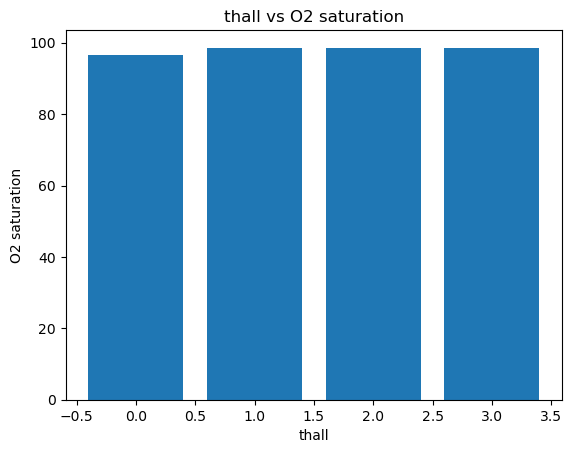

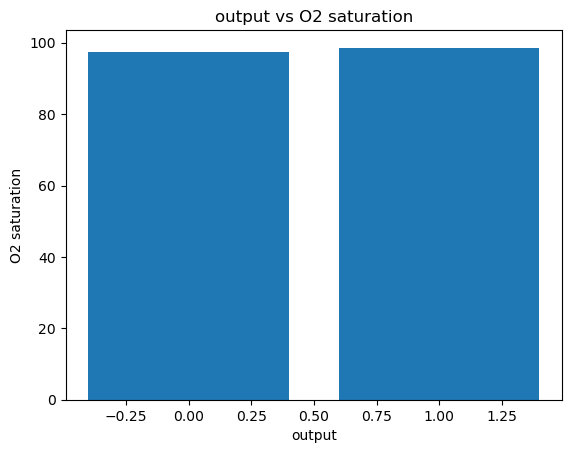

In [12]:
# Iterate over each pair of features
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        feature1 = df.columns[i]
        feature2 = df.columns[j]
        
        # Create a bar plot for the current pair of features
        plt.figure()
        plt.bar(df[feature1], df[feature2])
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f'{feature1} vs {feature2}')
        plt.show()


# Removing Outliers

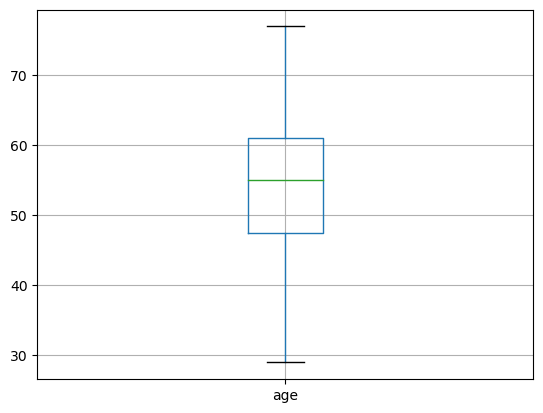

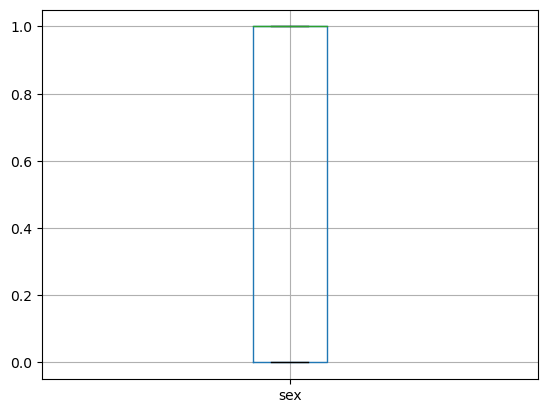

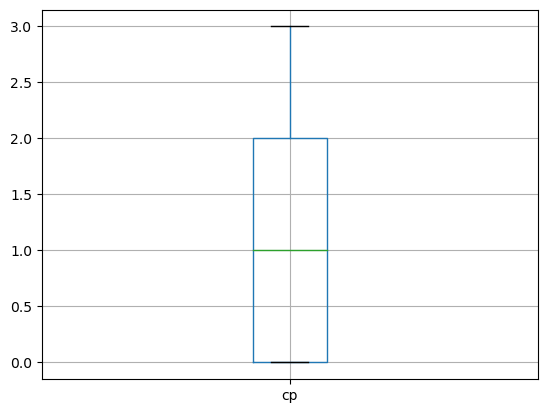

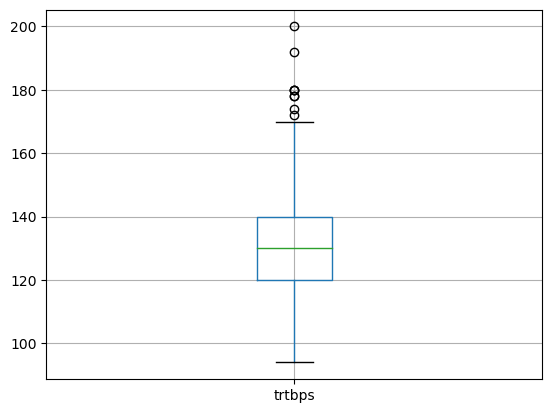

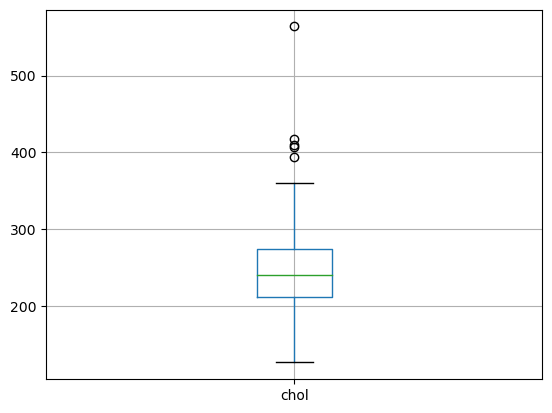

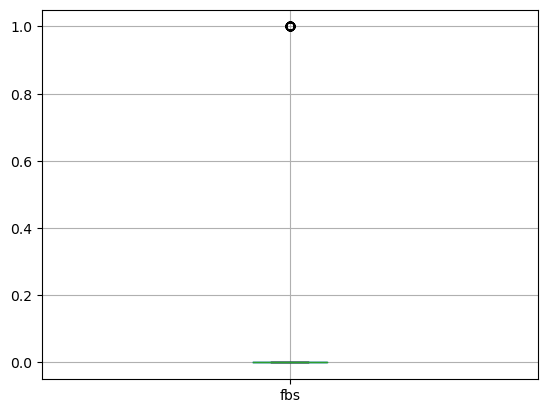

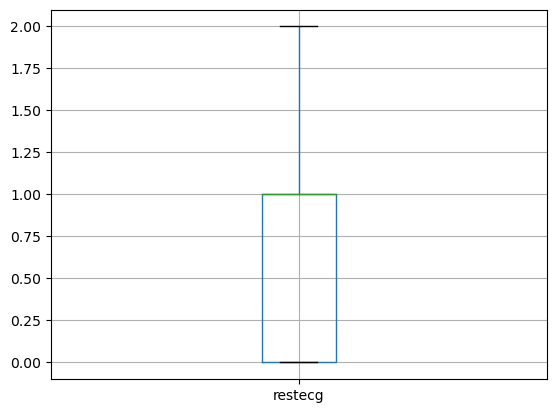

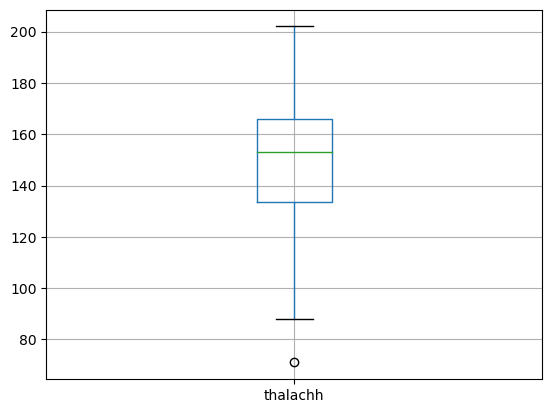

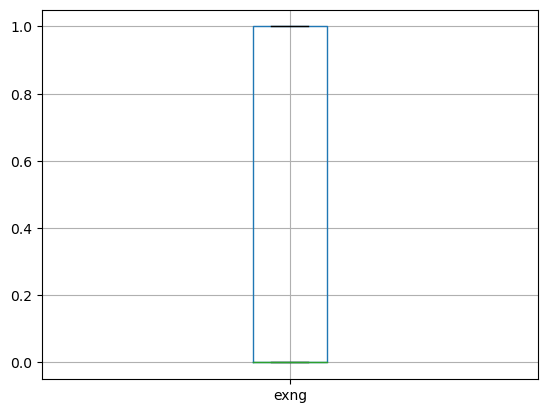

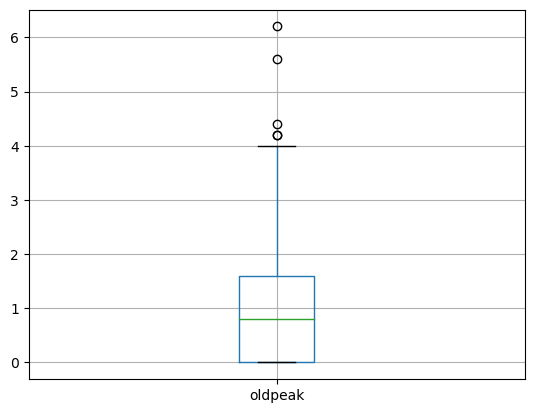

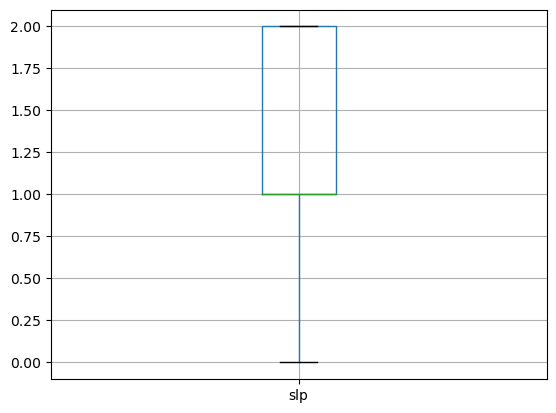

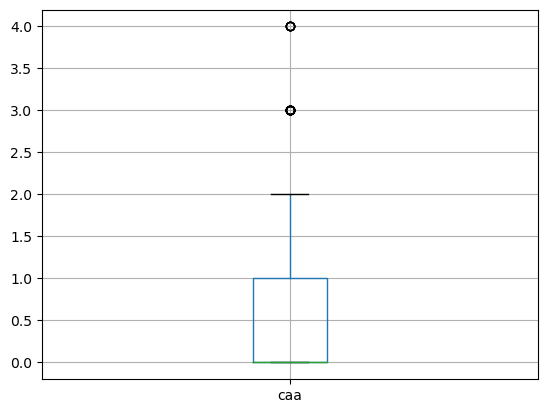

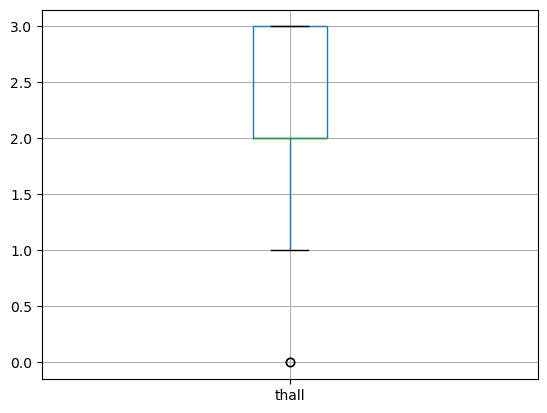

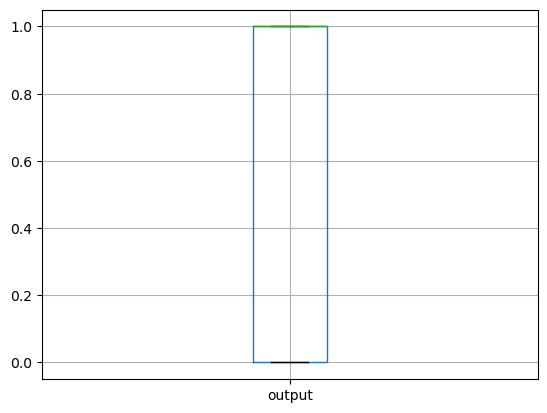

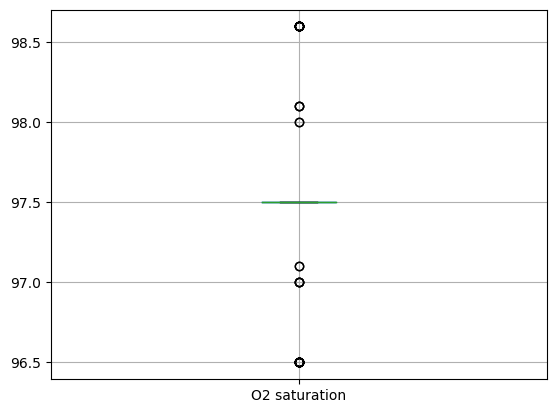

In [13]:
for x in df.columns:

    df.boxplot(column=[x])
    plt.show()

In [14]:
for i in df.columns:
    Q3 = df[i].quantile(.75)
    Q1 = df[i].quantile(.25)
    IQR = Q3 - Q1 

    upper_whisker = Q3 + 1.5 * IQR
    lower_whisker = Q1 - 1.5 * IQR

    filt2 = df[i] >  upper_whisker 
    filt3 = df[i] <  lower_whisker

    df.loc[filt2, i] = upper_whisker
    df.loc[filt3, i] = lower_whisker


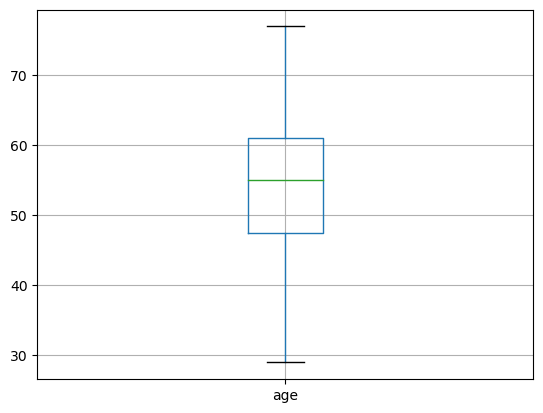

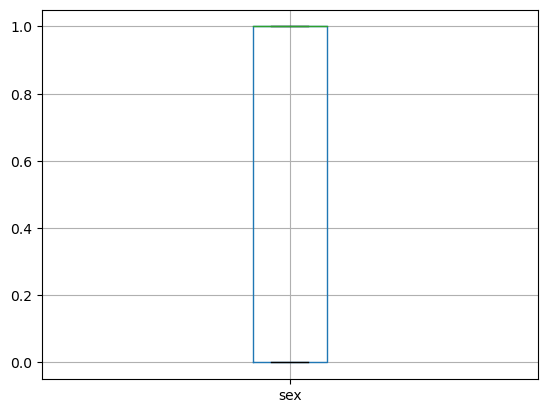

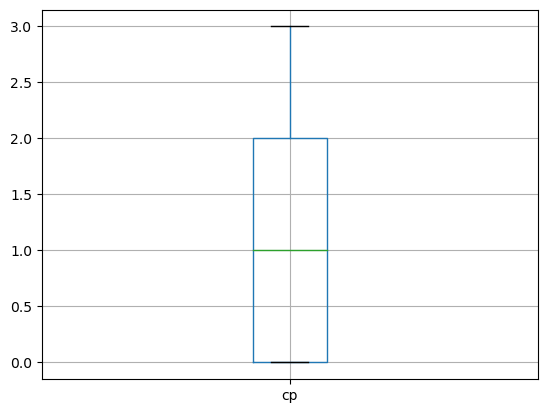

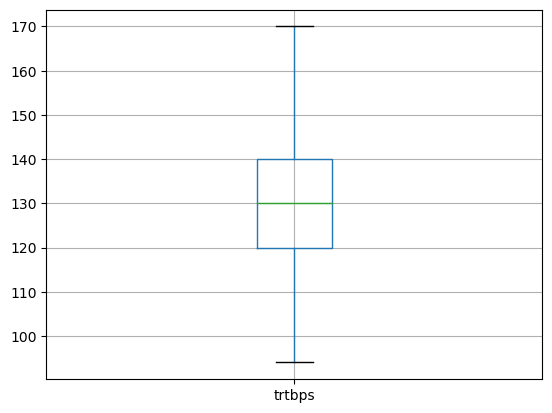

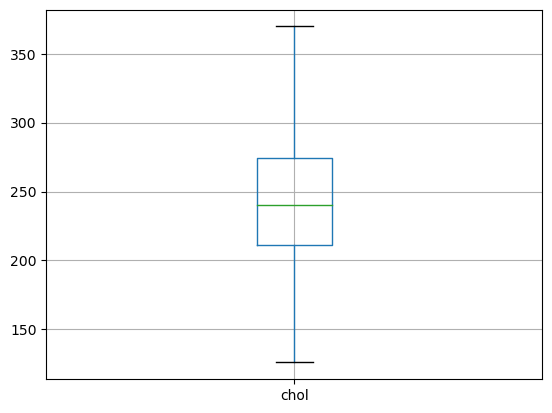

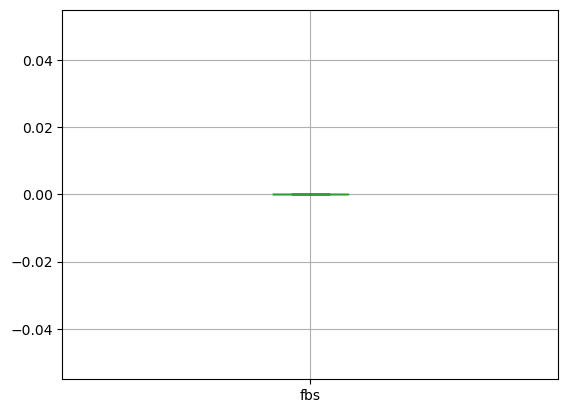

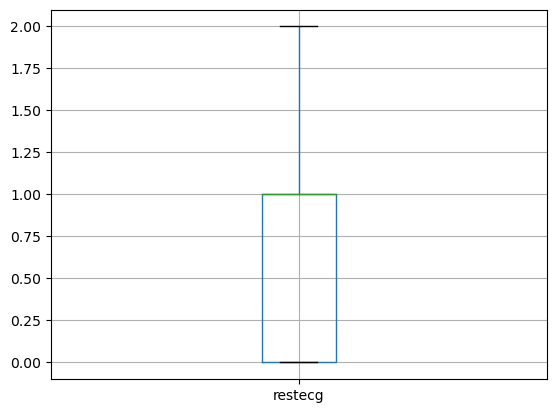

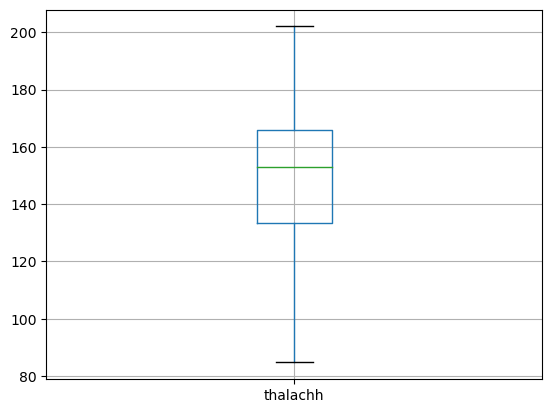

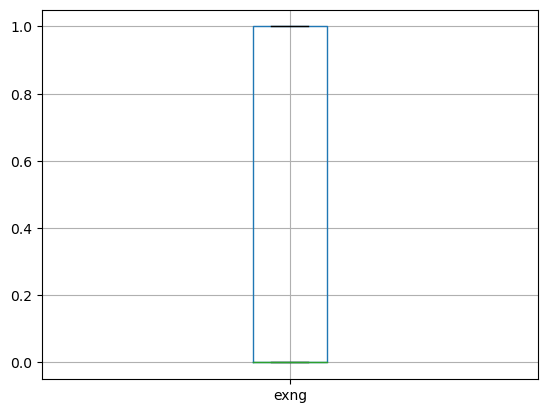

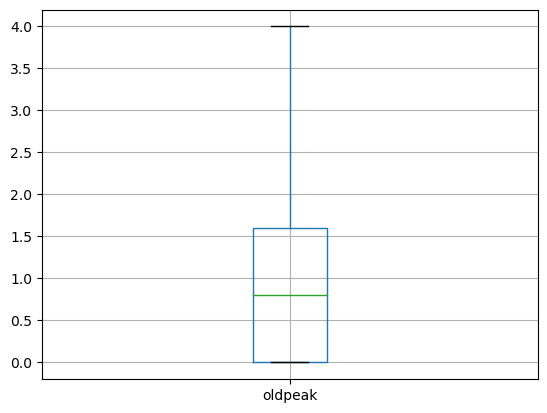

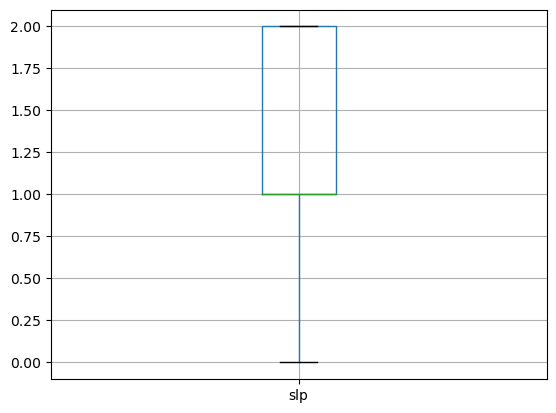

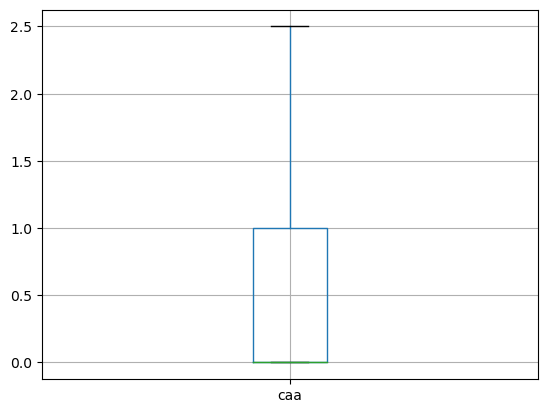

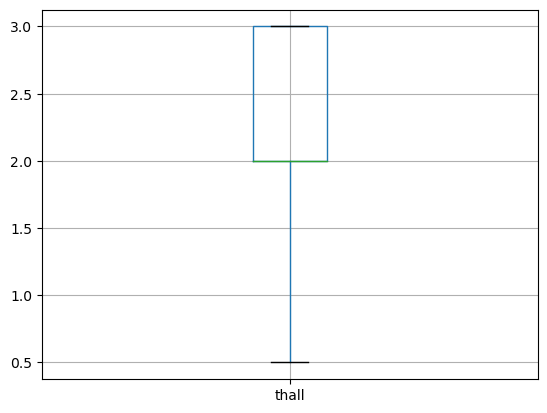

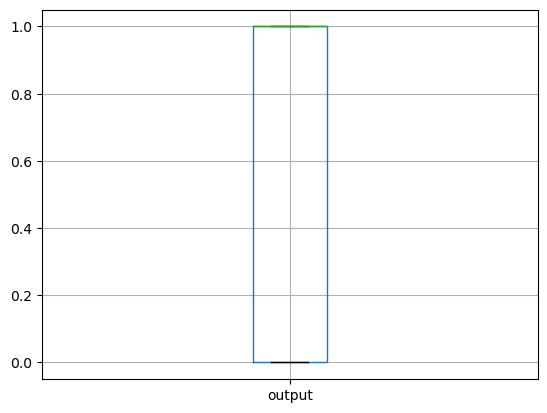

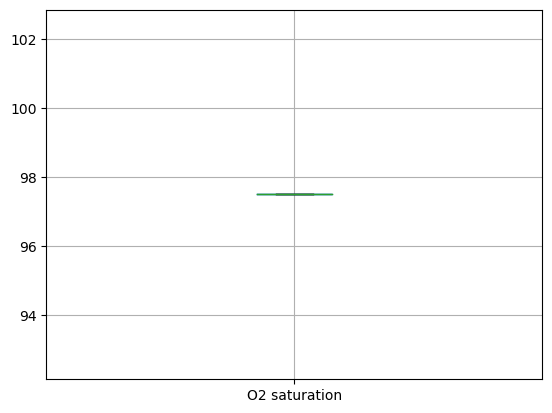

In [15]:
for x in df.columns:

    df.boxplot(column=[x])
    plt.show()

# Feature Engineering (Selection)

In [16]:
X = df.drop('output', axis=1)
y = df['output']

In [18]:
#Mutual Information
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


In [19]:
mi_scores = make_mi_scores(X, y)
mi_scores# show a few features with their MI scores

thall            0.147500
cp               0.141031
oldpeak          0.113825
exng             0.098433
chol             0.073624
thalachh         0.063701
caa              0.059628
sex              0.037553
age              0.021629
trtbps           0.013655
fbs              0.000000
restecg          0.000000
slp              0.000000
O2 saturation    0.000000
Name: MI Scores, dtype: float64

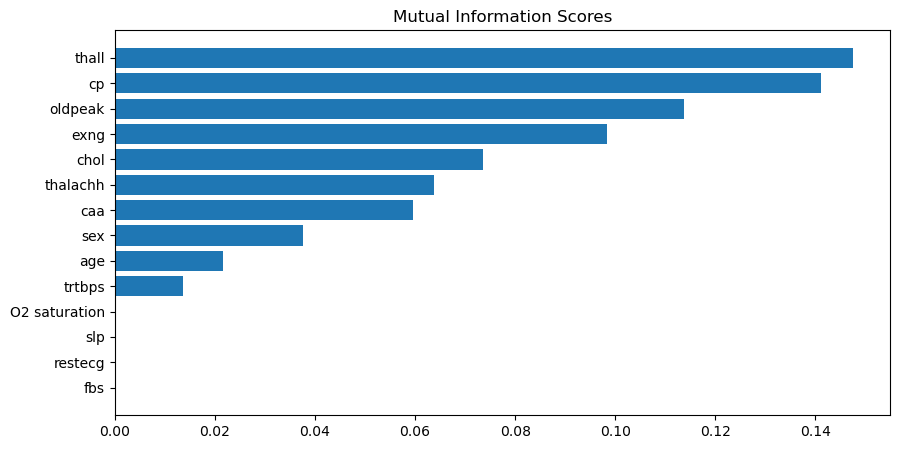

In [22]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(10, 5))
plot_mi_scores(mi_scores)

# Select K best

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=5)
selector.fit(X, y)
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]


print(selected_features)


Index(['cp', 'thalachh', 'exng', 'oldpeak', 'caa'], dtype='object')


In [23]:
X.drop(['O2 saturation',
         'slp',
         'restecg',
         'fbs'],axis=1,inplace=True)

# correlation matrix

<AxesSubplot:>

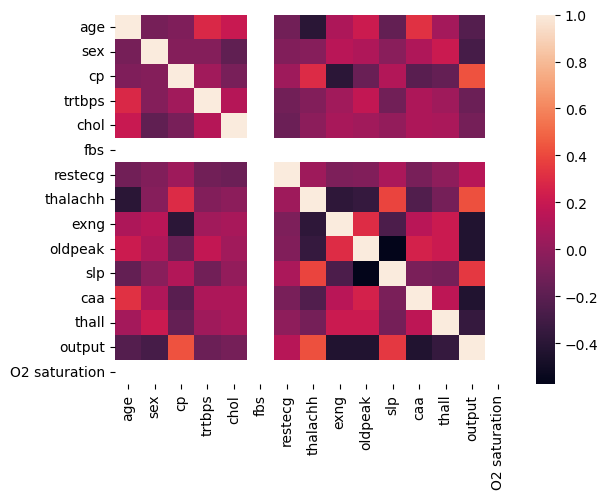

In [28]:
corr = df.corr()
sns.heatmap(corr)

#  Pincipal component analysis (PCA).

In [37]:
pca = PCA(n_components= 0.98) #retain 98% of the data's variance
X_pca = pca.fit_transform(X)
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)
X_pca

PC1        PC2        PC3
0    -11.018258   2.895183  15.425163
1      3.505727 -39.877682   0.649122
2    -41.993204 -23.252201   1.943737
3    -10.064229 -28.230885  -6.805314
4    107.914965 -16.579113 -15.223059
..          ...        ...        ...
298   -3.154083  27.527125   5.833717
299   17.541559  13.022230 -25.441732
300  -50.617838  13.682051  16.305383
301 -113.301910  37.420619   1.288925
302   -9.426475 -23.186286   2.642493

[303 rows x 3 columns]

# Data splitting

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Pipelines

In [45]:
DecisionTreePipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=0.98)),
                     ('decisiontree_classifier',DecisionTreeClassifier())])

In [46]:
RandomForestPipeline = Pipeline([('myscaler',MinMaxScaler()),
                     ('mypca',PCA(n_components=0.98)),
                     ('randomforest_classifier',RandomForestClassifier())])

In [47]:
The_Pipelined_Models = [DecisionTreePipeline, RandomForestPipeline]

In [48]:
PipelineDict = {0:'Decision Tree', 1: 'Random Forest'}

for pipe in The_Pipelined_Models:
    pipe.fit(X_train, y_train)

In [49]:
for i,model in enumerate(The_Pipelined_Models):
    print("{} Test Accuracy: {}".format(PipelineDict[i],model.score(X_test,y_test)))

Decision Tree Test Accuracy: 0.6885245901639344
Random Forest Test Accuracy: 0.7704918032786885
